### A MACHINE LEARNING WORKFLOW FOR MULTIVARIATE PRODUCTION FORECASTING OF OIL AND GAS WELLS USING THE DSEAT FIELD DATA WITH WEB-BASED IMPLEMENTATION.

**Author:** [Shedrach Igemhokhai](https://www.linkedin.com/shedrach-igemokhai)

##### To ensure all charts are rendered, including Plotly interactive visuals, and graphic representation of models, please Trust this notebook. Click on "File" above, and select "Trust Notebook"

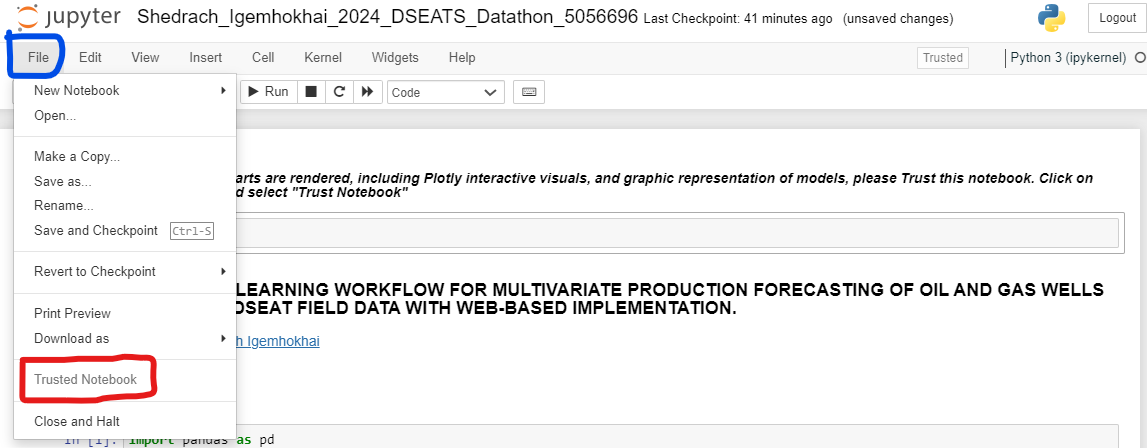

#### Loading data....

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\NAICE DATA COMP\dseats_2024_training_dataset.csv")

df.head(10)

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE  \
0  07/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
1  08/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
2  09/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
3  10/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
4  11/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
5  12/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
6  13/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
7  14/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
8  15/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
9  16/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   

  WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0     001-F-1 C  production        OP                 0.000000   
1     001-F-1 C  production        OP                 0.000000   
2     001-F-1 C  production        OP                 0.000000   
3     001-F-1 C  production        OP                 0.000000   
4     001-F-1 C  production        OP              4500.454030   
5     001-F-1 C  production        OP              4400.761310   
6     001-F-1 C  production        OP              4401.254745   
7     001-F-1 C  production        OP              4404.843060   
8     001-F-1 C  production        OP              4405.944045   
9     001-F-1 C  production        OP              4404.982115   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                 0.000000   
1                      273.15000                 0.000000   
2                      273.15000                 0.000000   
3                      273.15000                 0.000000   
4                      370.02589              4020.534770   
5                      370.07339              4080.987880   
6                      370.10885              4002.464000   
7                      370.11873              4100.408020   
8                      370.17136              4204.139715   
9                      370.21569              4345.242985   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0       0.000000     0.00000   
1                     0.0       0.000000     0.00000   
2                     0.0       0.000000     0.00000   
3                     0.0       0.000000     0.00000   
4                     0.0     479.919260    33.07195   
5                     0.0     319.773430    22.05334   
6                     0.0     398.790745    16.16326   
7                     0.0     304.435040    20.73712   
8                     0.0     201.804330    12.18153   
9                     0.0      59.739130     1.49020   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  
0                       0.0                   0.0                         0.0  
1                       0.0                   0.0                         0.0  
2                       0.0                   0.0                         0.0  
3                       0.0                   0.0                         0.0  
4                       0.0                   0.0                         0.0  
5                       0.0                   0.0                         0.0  
6                       0.0                   0.0                         0.0  
7                       0.0                   0.0                         0.0  
8                       0.0                   0.0                         0.0  
9                       0.0                   0.0                         0.0


#### Checking for missing values...

In [2]:
df.isnull().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

In [3]:
# Removing missing values since it is very small 
df = df.dropna() 

In [4]:
df.isnull().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

In [5]:
#Check For Duplicates
print("Number of Duplicates =",df.duplicated().sum())

Number of Duplicates = 0


In [6]:
# Formating data types
df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], format="%d/%m/%Y %H:%M", dayfirst=True)
df['Downhole Pressure (PSI)'] = df['Downhole Pressure (PSI)'].astype(float)
df['Downhole Temperature (Kelvin)'] = df['Downhole Temperature (Kelvin)'].astype(float)

In [7]:
# Descriptive Statistics
df.describe()

PRODUCTION DATE  N_WELL_BORE_CODE  \
count                           6919       6919.000000   
mean   2012-07-04 15:13:02.020523264        107.298164   
min              2008-02-12 00:00:00        105.000000   
25%              2010-07-03 12:00:00        107.000000   
50%              2013-01-18 00:00:00        107.000000   
75%              2014-07-19 12:00:00        108.000000   
max              2015-06-30 00:00:00        109.000000   
std                              NaN          0.979841   

       Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
count              6919.000000                    6919.000000   
mean               2589.726730                     349.741155   
min                   0.000000                     273.150000   
25%                   0.000000                     273.150000   
50%                3378.888887                     376.917890   
75%                3664.964728                     379.496655   
max                4606.666675                     381.652178   
std                1587.333139                      46.205896   

       Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  \
count              6919.000000             6919.000000    6919.000000   
mean               2163.861169              180.525795     717.198281   
min                   0.000000                0.000000       0.000000   
25%                 920.628174                0.000000     476.733295   
50%                2472.689942              213.173671     619.761214   
75%                2907.640850              300.368613     904.191977   
max                4592.612695              435.287508    1991.009935   
std                1052.406005              139.731097     347.369781   

        Choke Size  Oil Production (stb/day)  Gas Volume (scf/day)  \
count  6919.000000               6919.000000          6.919000e+03   
mean     21.864557               8499.586200          6.982589e+06   
min       0.000000                  0.000000          0.000000e+00   
25%       4.631982               1687.638450          1.434908e+06   
50%      14.301660               5479.470600          4.773450e+06   
75%      31.529768              11733.334550          9.914885e+06   
max     125.718570              37122.573600          3.004494e+07   
std      22.300691               8929.545197          7.102337e+06   

       Water Production (stb/day)  
count                 6919.000000  
mean                 11490.514991  
min                  -2879.813600  
25%                     81.958700  
50%                   5571.619100  
75%                  22270.216750  
max                  50444.164600  
std                  11484.480093

In [8]:
#Checking for negative production values....

neg_values = df[(df['Oil Production (stb/day)']<0) | (df['Gas Volume (scf/day)']<0) | (df['Water Production (stb/day)']<0)]

print("Rows with Negative Porduction values:")
neg_values

Rows with Negative Porduction values:


PRODUCTION DATE Field Name    WELL_BORE_CODE  N_WELL_BORE_CODE  \
1241      2008-04-23      DSEAT  DSEAT-001-F-12 H               107   
2761      2012-08-13      DSEAT  DSEAT-001-F-12 H               107   
4164      2009-03-03      DSEAT  DSEAT-001-F-14 H               108   
5372      2012-08-13      DSEAT  DSEAT-001-F-14 H               108   

     WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
1241      001-F-12  production        OP              3778.090061   
2761      001-F-12  production        OP                 0.000000   
4164      001-F-14  production        OP              3919.223637   
5372      001-F-14  production        OP              3666.939046   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
1241                     378.921069              2446.120354   
2761                     273.150000               738.789964   
4164                     378.613575              2440.423694   
5372                     375.036570              2997.727129   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
1241              159.654201    1331.969707   60.253108   
2761              149.643422     738.789964   21.297284   
4164                0.000000    1478.799943   68.800869   
5372              214.782410     669.211917   17.203700   

      Oil Production (stb/day)  Gas Volume (scf/day)  \
1241                17206.4837          1.490066e+07   
2761                 3981.3184          4.279550e+05   
4164                27293.1277          2.174814e+07   
5372                 1273.9137          1.325204e+05   

      Water Production (stb/day)  
1241                    -89.2551  
2761                  -2879.8136  
4164                     -5.9755  
5372                   -372.3051

###### As Production from oil and gas wells cannot be negative, it is imperative that that we drop those rows

In [9]:
df= df[(df['Oil Production (stb/day)']>=0) & (df['Gas Volume (scf/day)']>=0) & (df['Water Production (stb/day)']>=0)]
df.describe()

PRODUCTION DATE  N_WELL_BORE_CODE  \
count                           6915       6915.000000   
mean   2012-07-05 00:29:59.219088896        107.298048   
min              2008-02-12 00:00:00        105.000000   
25%              2010-07-04 00:00:00        107.000000   
50%              2013-01-19 00:00:00        107.000000   
75%              2014-07-20 00:00:00        108.000000   
max              2015-06-30 00:00:00        109.000000   
std                              NaN          0.980038   

       Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
count              6915.000000                    6915.000000   
mean               2589.581344                     349.740178   
min                   0.000000                     273.150000   
25%                   0.000000                     273.150000   
50%                3378.868167                     376.917890   
75%                3664.896946                     379.496701   
max                4606.666675                     381.652178   
std                1587.289015                      46.206442   

       Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  \
count              6915.000000             6915.000000    6915.000000   
mean               2163.865852              180.554432     717.003057   
min                   0.000000                0.000000       0.000000   
25%                 920.628174                0.000000     476.670337   
50%                2472.959104              213.248053     619.668387   
75%                2907.640850              300.378667     903.935557   
max                4592.612695              435.287508    1991.009935   
std                1052.512366              139.753319     347.270182   

        Choke Size  Oil Production (stb/day)  Gas Volume (scf/day)  \
count  6915.000000               6915.000000          6.915000e+03   
mean     21.852974               8497.307603          6.981247e+06   
min       0.000000                  0.000000          0.000000e+00   
25%       4.630420               1687.638450          1.436886e+06   
50%      14.288426               5479.470600          4.773450e+06   
75%      31.528946              11731.573350          9.896699e+06   
max     125.718570              37122.573600          3.004494e+07   
std      22.295143               8928.065284          7.100618e+06   

       Water Production (stb/day)  
count                 6915.000000  
mean                 11497.645780  
min                      0.000000  
25%                     85.135150  
50%                   5607.975300  
75%                  22271.474750  
max                  50444.164600  
std                  11483.936833

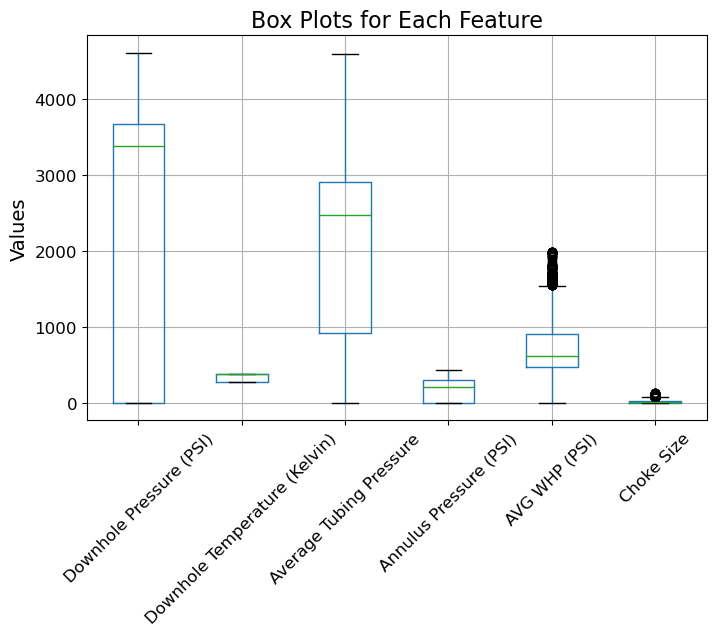

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Boxplot to observe data distribution
plt.figure(figsize=(8, 5))
df[['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 
    'AVG WHP (PSI)', 'Choke Size']].boxplot(rot=45, fontsize=12)
plt.title('Box Plots for Each Feature', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.show()

In [11]:
# Save the cleaned data
cleaned_file_path = r"C:\Users\USER\Desktop\NAICE DATA COMP\clean_dseats_2024_training_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

#### Lets see the number of wells in the dataset...

In [12]:
(df['WELL_BORE_CODE']).value_counts()

WELL_BORE_CODE
DSEAT-001-F-12 H    2609
DSEAT-001-F-14 H    2609
DSEAT-001-F-11 H     714
DSEAT-001-F-15 D     533
DSEAT-001-F-1 C      450
Name: count, dtype: int64

#### There are five wells in the  field, and we'd use one well get insight from the data. we'd use DSEAT-001-F-12 H, as it has the most data points

In [13]:
well_1 = df[df['WELL_BORE_CODE'] == "DSEAT-001-F-12 H"]

In [14]:
well_1.head()

PRODUCTION DATE Field Name    WELL_BORE_CODE  N_WELL_BORE_CODE  \
1170      2008-02-12      DSEAT  DSEAT-001-F-12 H               107   
1171      2008-02-13      DSEAT  DSEAT-001-F-12 H               107   
1172      2008-02-14      DSEAT  DSEAT-001-F-12 H               107   
1173      2008-02-15      DSEAT  DSEAT-001-F-12 H               107   
1174      2008-02-16      DSEAT  DSEAT-001-F-12 H               107   

     WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
1170      001-F-12  production        OP              4466.811124   
1171      001-F-12  production        OP              4393.986013   
1172      001-F-12  production        OP              4285.997889   
1173      001-F-12  production        OP              4316.109181   
1174      001-F-12  production        OP              4291.065025   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
1170                     377.568090              2918.125006   
1171                     378.552696              2641.101660   
1172                     378.925486              2637.084357   
1173                     378.901875              2622.064877   
1174                     378.961114              2617.265149   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
1170              270.273576    1548.686117   92.475107   
1171              238.766295    1752.884353   89.620148   
1172              183.564042    1648.913533   80.120465   
1173               76.328750    1694.044304   84.250990   
1174              179.577186    1673.799875   82.359026   

      Oil Production (stb/day)  Gas Volume (scf/day)  \
1170                 1790.4485          1.372770e+06   
1171                11760.4130          1.006919e+07   
1172                19650.5261          1.800141e+07   
1173                16406.0812          1.353496e+07   
1174                19195.8220          1.477213e+07   

      Water Production (stb/day)  
1170                   2421.7129  
1171                     44.8477  
1172                      7.2964  
1173                      6.1013  
1174                     30.7581

#### Let's visualise the production from this well over time...

In [15]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

# Oil production over time
fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=well_1['PRODUCTION DATE'], y=well_1['Oil Production (stb/day)'], 
                             mode='lines', name='Oil Production'))
fig_oil.update_layout(title=f'Oil Production over time', 
                      xaxis_title='Production Date', yaxis_title='Oil Production (stb/day)')


In [16]:

# Gas production over time
fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=well_1['PRODUCTION DATE'], y=well_1['Gas Volume (scf/day)'], 
                             mode='lines', name='Gas Production'))
fig_oil.update_layout(title=f'Gas Production over time', 
                      xaxis_title='Production Date', yaxis_title='Gas Volume (scf/day)')


In [17]:

# Water production over time
fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=well_1['PRODUCTION DATE'], y=well_1['Water Production (stb/day)'], 
                             mode='lines', name='Water Production'))
fig_oil.update_layout(title=f'Water Production over time', 
                      xaxis_title='Production Date', yaxis_title='Water Production (stb/day)')


from the above plots, we can see that while the production of oil and gas decreases over time, the water production for DSEAT-001-F-12 H in that same time period increases. Also, we can notice a similar trend for oil and gas production over time.

###### let's also see how other parameters trends with time

In [18]:
# Average Tubing presssure with time

fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=well_1['PRODUCTION DATE'], y=well_1['Average Tubing Pressure'], 
                             mode='lines', name='Tubing Pressure'))
fig_oil.update_layout(title=f'Average Tubing Pressure over time', 
                      xaxis_title='Production Date', yaxis_title='Average Tubing Pressure')


In [19]:
# Downhole Pressure with time

fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=well_1['PRODUCTION DATE'], y=well_1['Downhole Pressure (PSI)'], 
                             mode='lines', name='Oil Production'))
fig_oil.update_layout(title=f'Downhole Pressure over time', 
                      xaxis_title='Production Date', yaxis_title='Downhole Pressure (PSI)')


In [20]:
# Average Wellhead Pressure With Time

fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=well_1['PRODUCTION DATE'], y=well_1['AVG WHP (PSI)'], 
                             mode='lines', name='Oil Production'))
fig_oil.update_layout(title=f'Average wellhead pressure over time', 
                      xaxis_title='Production Date', yaxis_title='AVG WHP (PSI)')


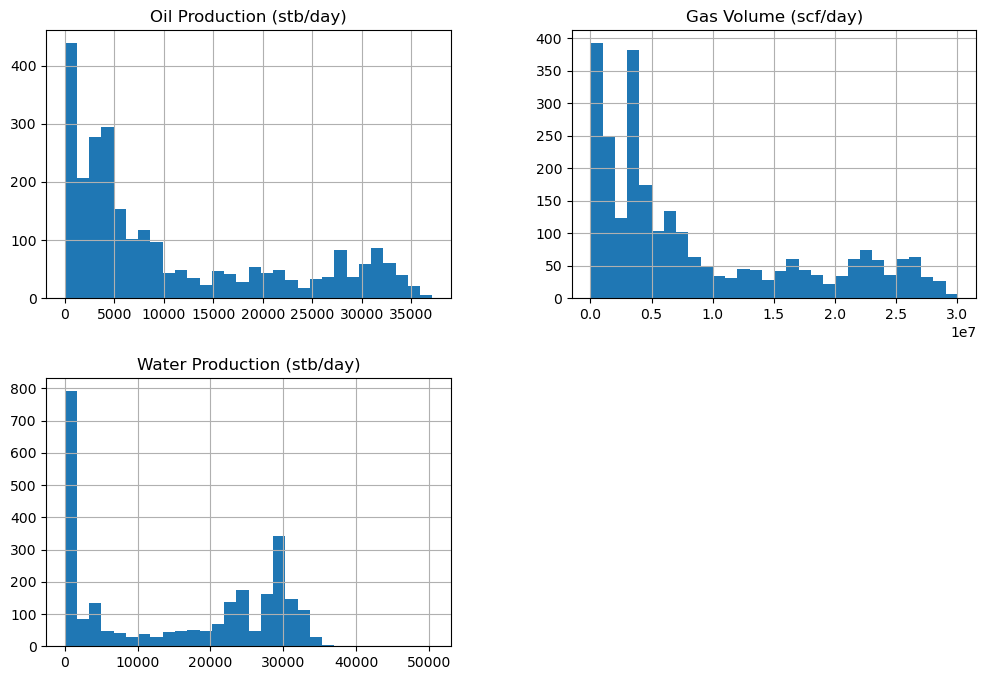

In [21]:
# Distribution Analysis
well_1[['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']].hist(bins=30, figsize=(12, 8))
plt.show()

The distribtion plots above shows the majority of the oil and water production over the time period was between 0 to about 10,000 STB/D, and between 0 to about 10, 000, 000 SCF/D for well DSEAT-001-F-12 H

#### In order to viualise the relationship between the parameters in the dataset, we'd use a pairplot

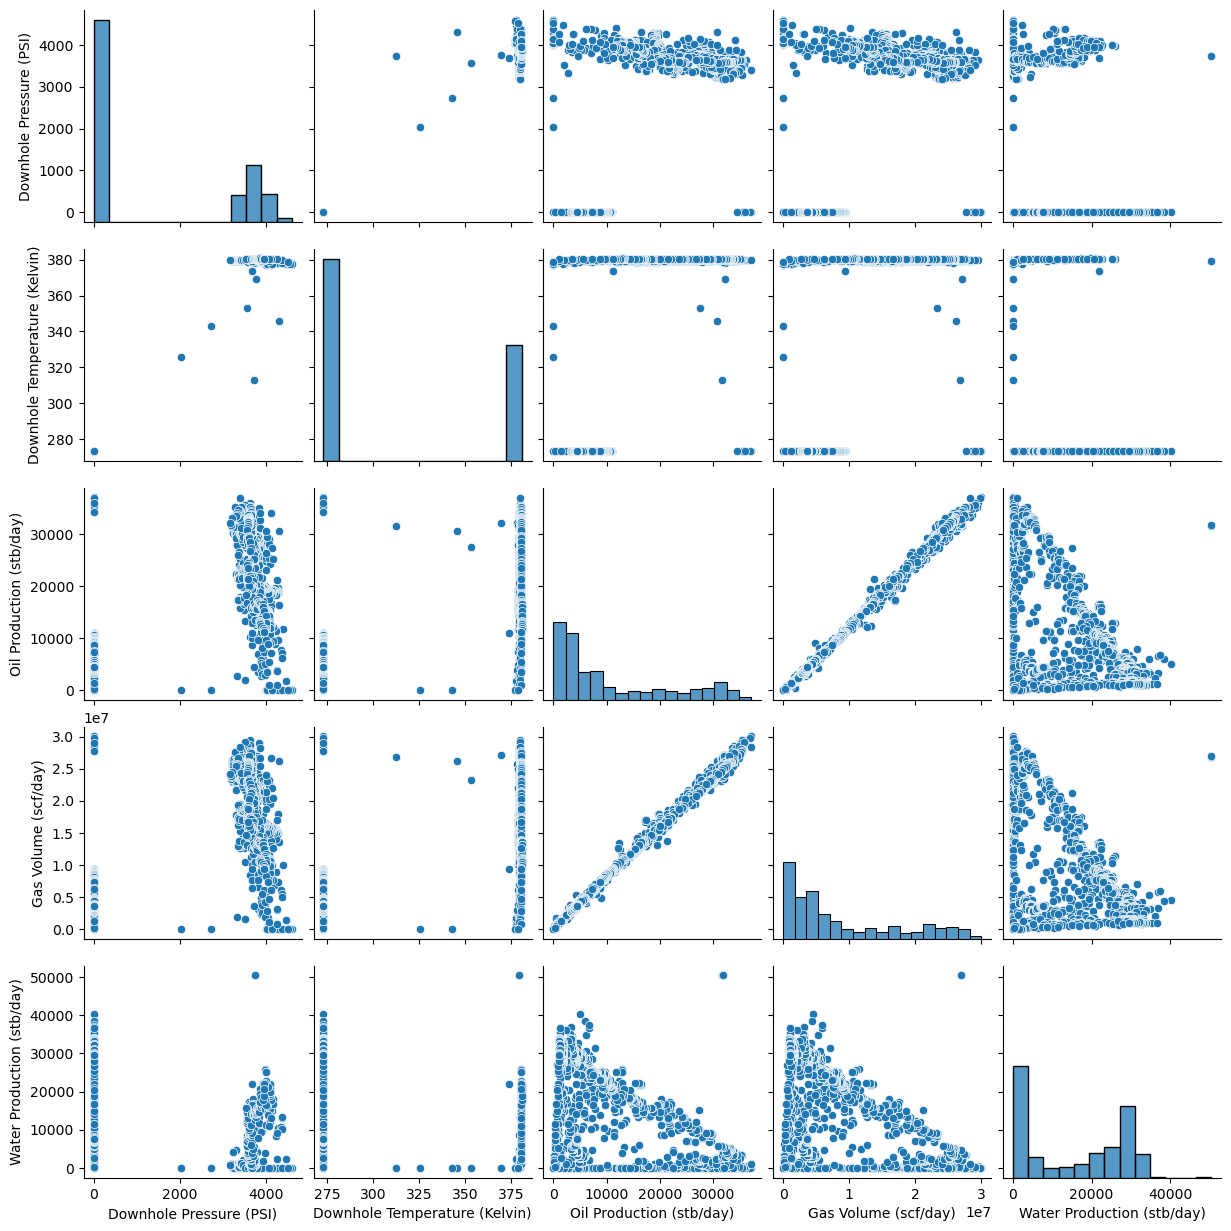

In [22]:
df.reset_index(inplace=True)

# Pressure and Temperature Impact
sns.pairplot(well_1[['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Oil Production (stb/day)', 
                 'Gas Volume (scf/day)', 'Water Production (stb/day)']])
plt.show()

One Significant take off from the pairplot above is the almost perfect correlation between oil production and gas production, denoting that an increase in oil production will bring about a corresponding increase in gas production in almost the same scale. This also confirms the similar time series trend for oil and gas production above.

#### Let's take a look at the average parameter values of the parameters in the dataset

In [23]:
numeric_cols = ['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 
                'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size', 
                'Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']

# Group by WELL_BORE_CODE and calculate mean
well_group = df.groupby('WELL_BORE_CODE')[numeric_cols].mean()

In [24]:
print("\nWell Group Average Values:")
well_group.head()


Well Group Average Values:


Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
WELL_BORE_CODE                                                             
DSEAT-001-F-1 C               3472.238874                     377.993464   
DSEAT-001-F-11 H              3364.670288                     376.724461   
DSEAT-001-F-12 H              1366.985483                     312.028904   
DSEAT-001-F-14 H              3355.661439                     369.180744   
DSEAT-001-F-15 D              3040.688727                     379.172667   

                  Average Tubing Pressure  Annulus Pressure (PSI)  \
WELL_BORE_CODE                                                      
DSEAT-001-F-1 C               2722.663294                0.000000   
DSEAT-001-F-11 H              2455.074044              279.736749   
DSEAT-001-F-12 H              1372.942189              246.467068   
DSEAT-001-F-14 H              2732.487099              109.441593   
DSEAT-001-F-15 D              2390.142599              225.583788   

                  AVG WHP (PSI)  Choke Size  Oil Production (stb/day)  \
WELL_BORE_CODE                                                          
DSEAT-001-F-1 C      749.575581   29.591942               2007.602503   
DSEAT-001-F-11 H     910.657264   35.201251               6805.840521   
DSEAT-001-F-12 H     751.294551   22.355430              10726.273256   
DSEAT-001-F-14 H     637.673158   17.423782               9357.949622   
DSEAT-001-F-15 D     650.546128   16.659070               1118.861778   

                  Gas Volume (scf/day)  Water Production (stb/day)  
WELL_BORE_CODE                                                      
DSEAT-001-F-1 C           1.661200e+06                 1390.235089  
DSEAT-001-F-11 H          5.740838e+06                 1773.709083  
DSEAT-001-F-12 H          8.759950e+06                15318.827891  
DSEAT-001-F-14 H          7.694371e+06                14424.831300  
DSEAT-001-F-15 D          9.371485e+05                   24.352095

DSEAT-001-F-12 H has the highest average oil production per day.

DSEAT-001-F-15 D has the highest average gas production per day.

DSEAT-001-F-15 D also significant low water production per day, which is highly desirable.

#### To further understand the distribution of the fluid production, we'd get insights from the cummulative density plot below.

In [25]:
import numpy as np
def plot_cdf(df, well_column, production_columns):
    wells = df[well_column].unique()
    
    fig, axes = plt.subplots(len(production_columns), 1, figsize=(10, 6 * len(production_columns)))

    if len(production_columns) == 1:
        axes = [axes]

    for idx, production_column in enumerate(production_columns):
        for well in wells:
            well_data = df[df[well_column] == well]
            sorted_data = np.sort(well_data[production_column])
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            axes[idx].plot(sorted_data, cdf, label=f'Well {well}')
        
        axes[idx].set_title(f'Cumulative Density Function for {production_column}')
        axes[idx].set_xlabel(production_column)
        axes[idx].set_ylabel('CDF')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

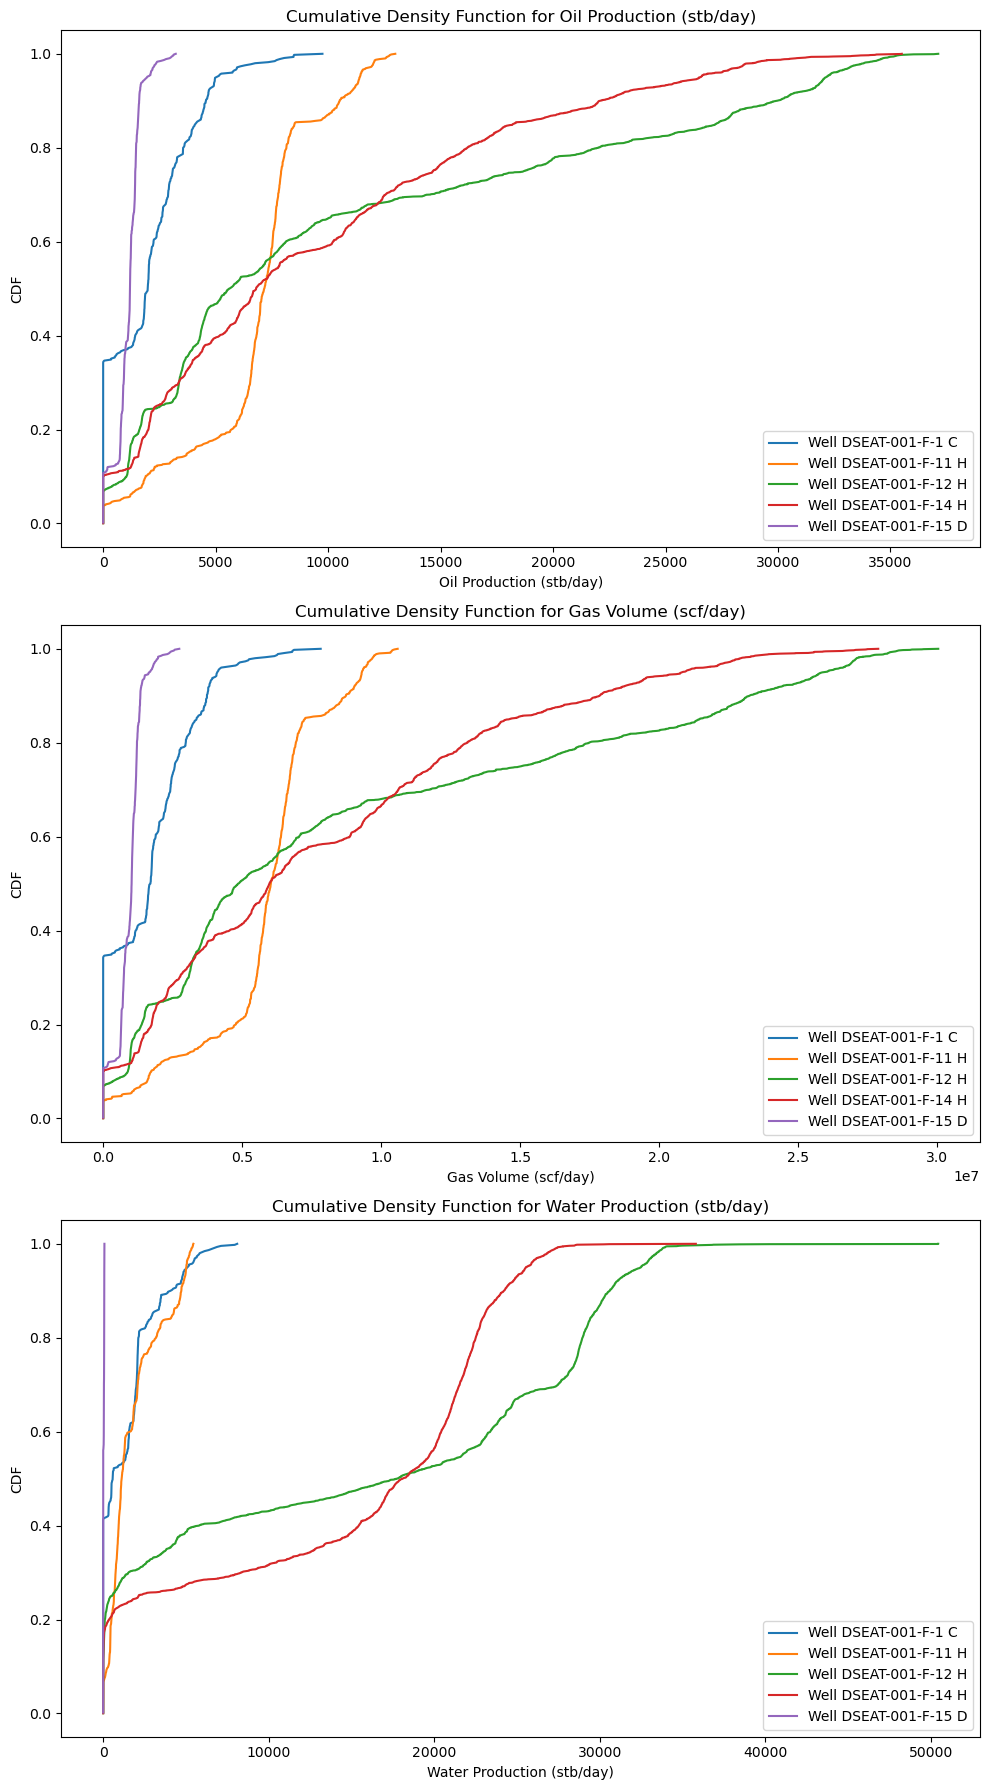

In [26]:
plot_cdf(df, 'WELL_BORE_CODE', ['Oil Production (stb/day)', 'Gas Volume (scf/day)','Water Production (stb/day)'])

from the above plots, we can see that two wells, DSEAT-001-F-12 H and DSEAT-001-F-14 H, had the highest oil and gas production. well DSEAT-001-F-1 C has about 35-37% of its oil and gas production significantly low, denoted by the vertical line at the 0 mark. DSEAT-001-F-15 D has its entire water production vertical at 0, denoting extremely low to zero water production. this can be further confirmed from the summary statistics below.

In [27]:
well_data_D15 = df[df['WELL_BORE_CODE'] == 'DSEAT-001-F-15 D']['Water Production (stb/day)']
well_data_D15.describe()

count    533.000000
mean      24.352095
std       28.894273
min        0.000000
25%        0.000000
50%        0.000000
75%       57.490600
max       76.549300
Name: Water Production (stb/day), dtype: float64

#### Now, lets conduct a Decline Curve Analysis (DCA) for DSEAT-001-F-12 H. DCA is used to extrapolate trends in the production from oil and gas wells, by assuming a decline in the performance of a well. For DCA, the initial production rate is denoted, and a decline rate is estimated. This decline rate, together with the initial oil production and the days from start of production can be used as an empirical method to forecast oil and gas production.

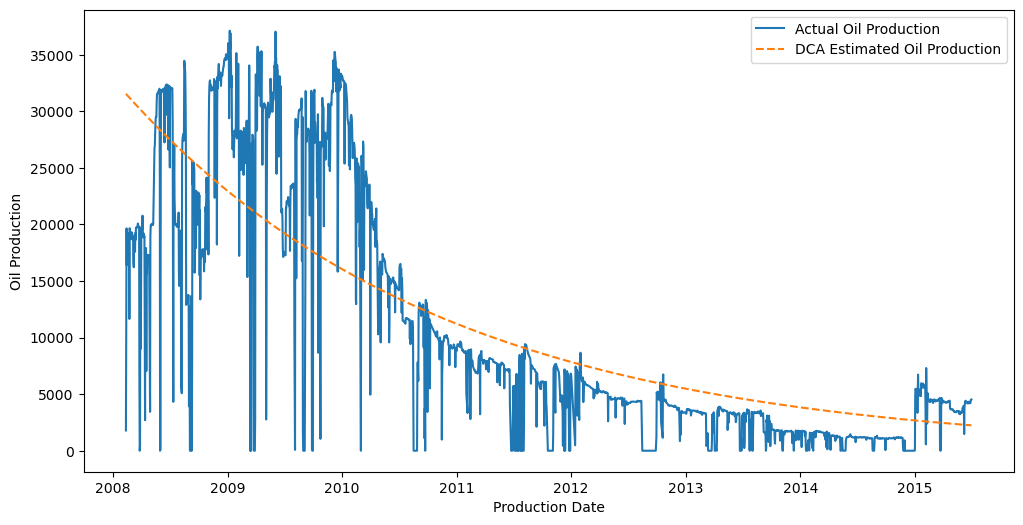

Initial production rate (qi): 31547.0550635811
Decline rate (di): 0.0009808278162276166


In [28]:
# Decline Curve Analysis 
from scipy.optimize import curve_fit

def exponential_decline(t, qi, di):
    return qi * np.exp(-di * t)

well_1['Days'] = (well_1['PRODUCTION DATE'] - well_1['PRODUCTION DATE'].min()).dt.days

popt, pcov = curve_fit(exponential_decline, well_1['Days'], well_1['Oil Production (stb/day)'], 
                       p0=(well_1['Oil Production (stb/day)'].iloc[0], 0.1))

qi, di = popt
well_1['Estimated Oil Production'] = exponential_decline(well_1['Days'], qi, di)

plt.figure(figsize=(12, 6))
plt.plot(well_1['PRODUCTION DATE'], well_1['Oil Production (stb/day)'], label='Actual Oil Production')
plt.plot(well_1['PRODUCTION DATE'], well_1['Estimated Oil Production'], label='DCA Estimated Oil Production', linestyle='--')
plt.xlabel("Production Date")
plt.ylabel("Oil Production")
plt.legend()
plt.show()

print(f"Initial production rate (qi): {qi}")
print(f"Decline rate (di): {di}")


## MACHINE LEARNING MODELLING

In [29]:
# Importing some of the Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score

## Feature Engineering Steps

#### An effective Machine learning models, depends significantly on the features utilizeed for training. here, we are going to create some features based on my machine learning and domain knowledge

In [30]:
def feature_engineering(df):
    if df['PRODUCTION DATE'].dtype == object:
        df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], format='%d/%m/%Y %H:%M')
    
    # Calculate days from the start of production
    df['Days_From_Start'] = (df['PRODUCTION DATE'] - df['PRODUCTION DATE'].min()).dt.days

    # Pressure and Temperature Ratios
    df['Pressure_Difference'] = df['Downhole Pressure (PSI)'] - df['Average Tubing Pressure']
    df['Pressure_Ratio'] = df['Downhole Pressure (PSI)'] / (df['Average Tubing Pressure'] + 1e-5)  # Add small value to avoid division by zero
    df['Temperature_Difference'] = df['Downhole Temperature (Kelvin)'] - 298

    # Log Transformations 
    df['Log_Downhole_Pressure'] = np.log1p(df['Downhole Pressure (PSI)'])
    df['Log_Downhole_Temperature'] = np.log1p(df['Downhole Temperature (Kelvin)'])
    df['Log_Average_Tubing_Pressure'] = np.log1p(df['Average Tubing Pressure'])
    df['Log_Annulus_Pressure'] = np.log1p(df['Annulus Pressure (PSI)'])
    df['Log_AVG_WHP'] = np.log1p(df['AVG WHP (PSI)'])
    df['Log_Choke_Size'] = np.log1p(df['Choke Size'])

    # Moving Averages
    df['MA7_Downhole_Pressure'] = df['Downhole Pressure (PSI)'].rolling(window=7).mean()
    df['MA30_Downhole_Pressure'] = df['Downhole Pressure (PSI)'].rolling(window=30).mean()

    df['MA7_Tubing_Pressure'] = df['Average Tubing Pressure'].rolling(window=7).mean()
    df['MA30_Tubing_Pressure'] = df['Average Tubing Pressure'].rolling(window=30).mean()

    df['MA7_Annulus_Pressure'] = df['Annulus Pressure (PSI)'].rolling(window=7).mean()
    df['MA30_Annulus_Pressure'] = df['Annulus Pressure (PSI)'].rolling(window=30).mean()
    
    # The Moving averages would bring about cases of Missing values. as dropping them would bring about
    # a loss of 30 data points, which can't be accounted for in the total production estimates, we need
    # to deal with it. I propose using a Model-based inputation, as ffill, bfill, and mean inputation
    # drops the model accuracy in comparison with modelling with dropping the Missing values instead
    
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors =5)
    
    df[["MA7_Downhole_Pressure","MA30_Downhole_Pressure","MA7_Tubing_Pressure","MA30_Tubing_Pressure", "MA7_Annulus_Pressure",
        "MA30_Annulus_Pressure"]] = imputer.fit_transform(df[["MA7_Downhole_Pressure","MA30_Downhole_Pressure","MA7_Tubing_Pressure",
                                                              "MA30_Tubing_Pressure", "MA7_Annulus_Pressure","MA30_Annulus_Pressure"]])

    return df

In [31]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          6915 non-null   int64         
 1   PRODUCTION DATE                6915 non-null   datetime64[ns]
 2   Field Name                     6915 non-null   object        
 3   WELL_BORE_CODE                 6915 non-null   object        
 4   N_WELL_BORE_CODE               6915 non-null   int64         
 5   WellBore Name                  6915 non-null   object        
 6   FLOW_KIND                      6915 non-null   object        
 7   WELL_TYPE                      6915 non-null   object        
 8   Downhole Pressure (PSI)        6915 non-null   float64       
 9   Downhole Temperature (Kelvin)  6915 non-null   float64       
 10  Average Tubing Pressure        6915 non-null   float64       
 11  Annulus Pressure 

In [32]:
df1 = feature_engineering(df1)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          6915 non-null   int64         
 1   PRODUCTION DATE                6915 non-null   datetime64[ns]
 2   Field Name                     6915 non-null   object        
 3   WELL_BORE_CODE                 6915 non-null   object        
 4   N_WELL_BORE_CODE               6915 non-null   int64         
 5   WellBore Name                  6915 non-null   object        
 6   FLOW_KIND                      6915 non-null   object        
 7   WELL_TYPE                      6915 non-null   object        
 8   Downhole Pressure (PSI)        6915 non-null   float64       
 9   Downhole Temperature (Kelvin)  6915 non-null   float64       
 10  Average Tubing Pressure        6915 non-null   float64       
 11  Annulus Pressure 

In [34]:
initial_features = ['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size']
engineered_features = ['Days_From_Start', 'Pressure_Difference', 'Pressure_Ratio', 'Temperature_Difference', 
                       'Log_Downhole_Pressure', 'Log_Downhole_Temperature', 'Log_Average_Tubing_Pressure', 'Log_Annulus_Pressure', 'Log_AVG_WHP', 'Log_Choke_Size',
                       'MA7_Downhole_Pressure', 'MA30_Downhole_Pressure', 'MA7_Tubing_Pressure', 'MA30_Tubing_Pressure', 
                       'MA7_Annulus_Pressure', 'MA30_Annulus_Pressure']
all_features = initial_features + engineered_features

X = df1[all_features]
y = df1[['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

## Unlike Tree Based Models, some of the models to be utilised here (LR and KRR) require scaling for effective modelling
sc=StandardScaler()
X_train1=sc.fit_transform(X_train)
X_test1=sc.transform(X_test)


In [35]:
numerical_attributes = df1.select_dtypes(include=['int64', 'float64'])

<AxesSubplot:>

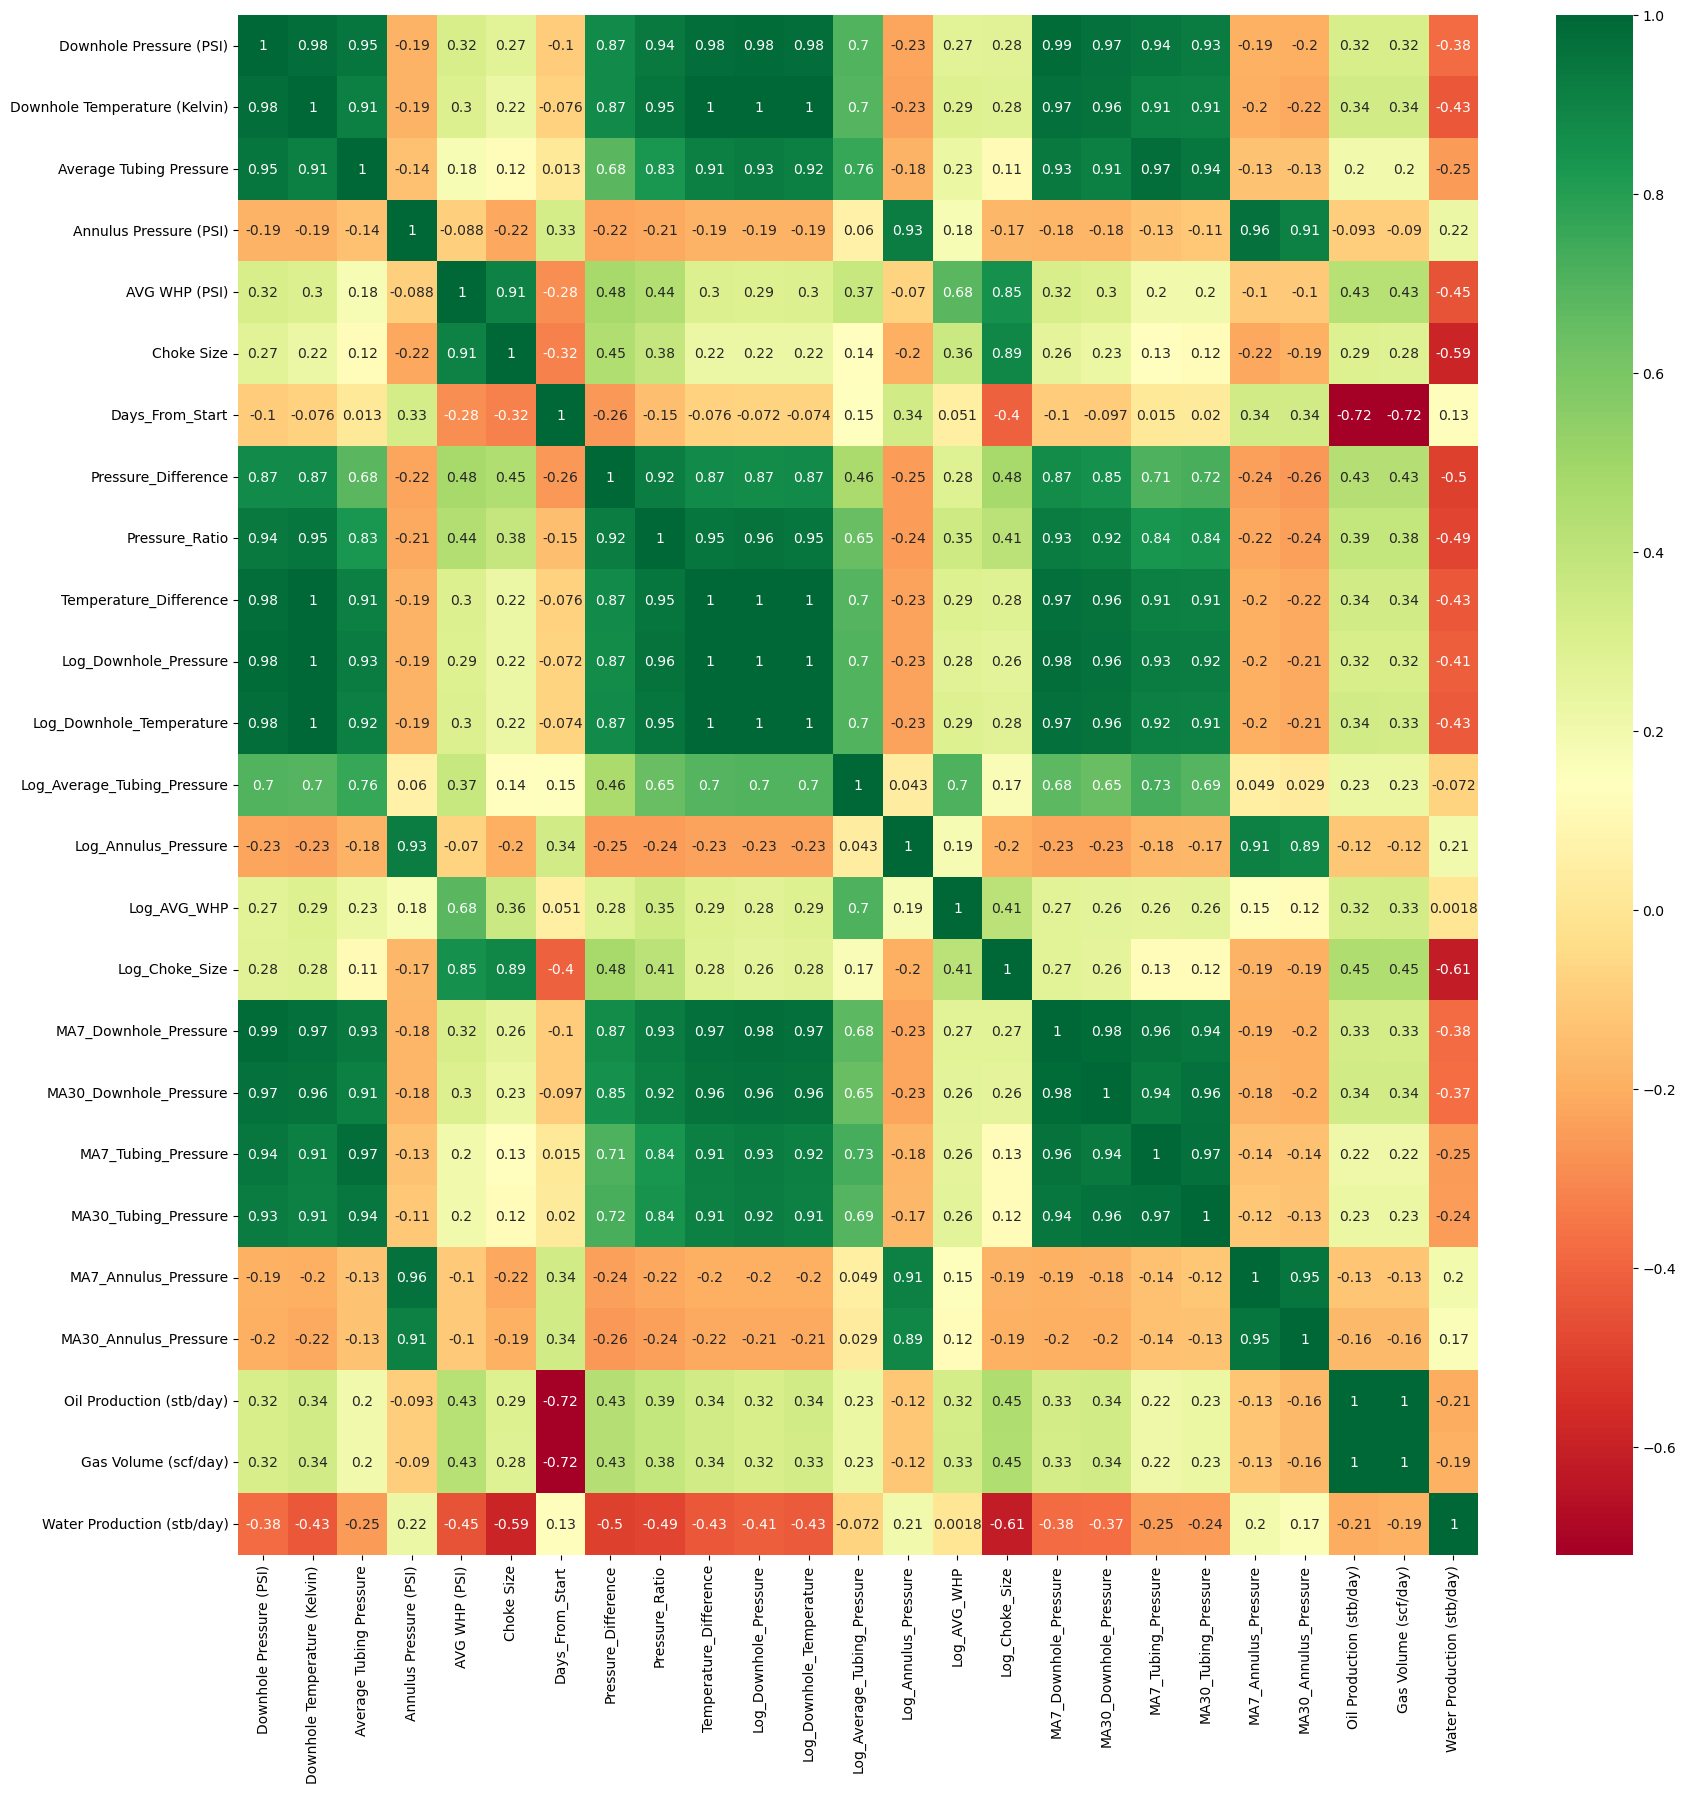

In [36]:
# Correlation between the data features
corr_df = all_features + ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
plt.figure(figsize=(20,20))
sns.heatmap(df1[corr_df].corr(),annot=True,cmap="RdYlGn")

From the Pearson Correlation plot above, we can see that the new engineered features did show some high correlations with the target features. e.g "days from start of production", "pressure difference" and "log of choke size" has pearson correlation coefficient of -0.72, 0.43, and 0.45, with oil production, respectively.

#### We'd evaluate the performance of our models using MSE, RMSE, MAE and R2. The functon below denotes the computation.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_evaluation(model_name, y_test, y_pred):
    metrics = {}
    
    for i, target in enumerate(['Oil Production', 'Gas Volume', 'Water Production']):
        mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        
        metrics[target] = {
            'Model': model_name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }
        
    return metrics


#### Models to be utilised includes:
- Linear Regression
- Kernel Ridge Regression
- Random Forest
- XGBoost
- Extra Trees Regression
- Gradient Boosting
- AdaBoost
- MLP

##### LINEAR REGRESSION

In [38]:
lr_model = MultiOutputRegressor(LinearRegression())
lr_model.fit(X_train1, y_train)

y_pred_lr = lr_model.predict(X_test1)

In [39]:
# Evaluating the LR model
model_evaluation(model_name = "LINEAR REGRESSION" , y_test = y_test, y_pred=y_pred_lr)

{'Oil Production': {'Model': 'LINEAR REGRESSION',
  'MSE': 18926402.5776695,
  'RMSE': 4350.448549019917,
  'MAE': 3033.2885127577556,
  'R2': 0.7595052853608298},
 'Gas Volume': {'Model': 'LINEAR REGRESSION',
  'MSE': 11733297966860.75,
  'RMSE': 3425390.191914018,
  'MAE': 2352788.5482512508,
  'R2': 0.7645068275157485},
 'Water Production': {'Model': 'LINEAR REGRESSION',
  'MSE': 33838849.07522143,
  'RMSE': 5817.116904036005,
  'MAE': 4416.3007678431995,
  'R2': 0.7546806326111555}}

##### KERNEL RIDGE

In [40]:
# Kernel Ridge Regression with GridSearch for hyperparameter tuning
param_grid_krr = {
    'alpha': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]  
}

krr = KernelRidge()
krr_grid = GridSearchCV(krr, param_grid_krr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose = True)
krr_model = MultiOutputRegressor(krr_grid)
krr_model.fit(X_train1, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


MultiOutputRegressor(estimator=GridSearchCV(cv=3, estimator=KernelRidge(),
                                            n_jobs=-1,
                                            param_grid={'alpha': [0.1, 1, 10],
                                                        'gamma': [0.01, 0.1, 1],
                                                        'kernel': ['linear',
                                                                   'rbf']},
                                            scoring='neg_mean_squared_error',
                                            verbose=True))

In [41]:
# Making predictions
y_pred_krr = krr_model.predict(X_test1)

In [42]:
# Evaluating the KERNEL RIDGE model
model_evaluation(model_name = "KERNEL RIDGE REGRESSION" , y_test = y_test, y_pred=y_pred_krr)

{'Oil Production': {'Model': 'KERNEL RIDGE REGRESSION',
  'MSE': 3676816.269784342,
  'RMSE': 1917.5026127190392,
  'MAE': 727.6416883338496,
  'R2': 0.9532792945752016},
 'Gas Volume': {'Model': 'KERNEL RIDGE REGRESSION',
  'MSE': 2433590480249.6484,
  'RMSE': 1559996.9487949803,
  'MAE': 607952.8012993959,
  'R2': 0.9511566190221968},
 'Water Production': {'Model': 'KERNEL RIDGE REGRESSION',
  'MSE': 6375674.848184425,
  'RMSE': 2525.009870908315,
  'MAE': 1034.849012689168,
  'R2': 0.9537786726446654}}

##### RANDOM FOREST

In [43]:
# Random Forest with GridSearch for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=66)
rf_grid = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose = True)
rf_model = MultiOutputRegressor(rf_grid)
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


MultiOutputRegressor(estimator=GridSearchCV(cv=3,
                                            estimator=RandomForestRegressor(random_state=66),
                                            n_jobs=-1,
                                            param_grid={'max_depth': [10, 20],
                                                        'min_samples_leaf': [1,
                                                                             2],
                                                        'min_samples_split': [2,
                                                                              5],
                                                        'n_estimators': [100,
                                                                         200]},
                                            scoring='neg_mean_squared_error',
                                            verbose=True))

In [44]:
y_pred_rf = rf_model.predict(X_test)

In [45]:
model_evaluation(model_name = "RANDOM FOREST" , y_test = y_test, y_pred=y_pred_rf)

{'Oil Production': {'Model': 'RANDOM FOREST',
  'MSE': 2793604.7580340267,
  'RMSE': 1671.4080166237168,
  'MAE': 574.2284310272685,
  'R2': 0.9645021193889901},
 'Gas Volume': {'Model': 'RANDOM FOREST',
  'MSE': 1840797042914.3904,
  'RMSE': 1356759.758731954,
  'MAE': 485806.549986539,
  'R2': 0.963054280496422},
 'Water Production': {'Model': 'RANDOM FOREST',
  'MSE': 5547921.729327479,
  'RMSE': 2355.4026681923156,
  'MAE': 880.1423307724249,
  'R2': 0.9597795821620291}}

In [46]:
# Saving model....
import joblib
joblib.dump(rf_model, 'rf_forecasting_model.pkl')

['rf_forecasting_model.pkl']

##### XGBOOST

In [47]:
# Implement XGBoost with GridSearch for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

xgb = XGBRegressor(random_state=9)
xgb_grid = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose = True)
xgb_model = MultiOutputRegressor(xgb_grid)
xgb_model.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


MultiOutputRegressor(estimator=GridSearchCV(cv=3,
                                            estimator=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constr...
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=100,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=9, ...),
                                            n_jobs=-1,
                                            param_grid={'learning_rate': [0.01,
                                                                          0.1],
                                                        'max_depth': [3, 6],
                                                        'n_estimators': [100,
                                                                         200],
                                                        'subsample': [0.8, 1]},
                                            scoring='neg_mean_squared_error',
                                            verbose=True))

In [48]:
y_pred_xgb = xgb_model.predict(X_test)

In [49]:
model_evaluation(model_name = "EXTREME GRADIENT BOOSTING" , y_test = y_test, y_pred=y_pred_xgb)

{'Oil Production': {'Model': 'EXTREME GRADIENT BOOSTING',
  'MSE': 2903911.392147002,
  'RMSE': 1704.0866738951402,
  'MAE': 657.3969662045336,
  'R2': 0.9631004709571267},
 'Gas Volume': {'Model': 'EXTREME GRADIENT BOOSTING',
  'MSE': 2030582117930.5908,
  'RMSE': 1424984.9535804198,
  'MAE': 562093.4651288794,
  'R2': 0.9592451988953278},
 'Water Production': {'Model': 'EXTREME GRADIENT BOOSTING',
  'MSE': 5805956.0925695915,
  'RMSE': 2409.555164873714,
  'MAE': 978.995266199997,
  'R2': 0.9579089267323948}}

In [50]:
joblib.dump(xgb_model, 'xgb_forecasting_model.pkl')

['xgb_forecasting_model.pkl']

##### EXTRA TREES REGRESSOR

In [51]:
param_grid_et = {
    'n_estimators': [100, 200],
    'max_features': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [52]:
from sklearn.ensemble import ExtraTreesRegressor

ett = ExtraTreesRegressor(random_state=9)
ett_grid = GridSearchCV(ett, param_grid_et, cv=3, scoring='neg_mean_squared_error', n_jobs=5, verbose = True)
ett_model = MultiOutputRegressor(ett_grid)
ett_model.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


MultiOutputRegressor(estimator=GridSearchCV(cv=3,
                                            estimator=ExtraTreesRegressor(random_state=9),
                                            n_jobs=5,
                                            param_grid={'max_features': [10,
                                                                         20],
                                                        'min_samples_leaf': [1,
                                                                             2],
                                                        'min_samples_split': [2,
                                                                              5],
                                                        'n_estimators': [100,
                                                                         200]},
                                            scoring='neg_mean_squared_error',
                                            verbose=True))

In [53]:
y_pred_ett = ett_model.predict(X_test)

In [54]:
model_evaluation(model_name = "EXTRA TREE REGRESSION" , y_test = y_test, y_pred=y_pred_ett)

{'Oil Production': {'Model': 'EXTRA TREE REGRESSION',
  'MSE': 2467641.096018401,
  'RMSE': 1570.8727179559778,
  'MAE': 504.9591237997109,
  'R2': 0.9686440865461127},
 'Gas Volume': {'Model': 'EXTRA TREE REGRESSION',
  'MSE': 1582484569118.2837,
  'RMSE': 1257968.4293011029,
  'MAE': 431123.1140218021,
  'R2': 0.9682387413460748},
 'Water Production': {'Model': 'EXTRA TREE REGRESSION',
  'MSE': 5140505.712698384,
  'RMSE': 2267.26833716223,
  'MAE': 820.7248969109122,
  'R2': 0.9627332003315288}}

In [55]:
joblib.dump(ett_model, 'ett_forecasting_model.pkl')

['ett_forecasting_model.pkl']

##### GRADIENT BOOSTING

In [56]:
param_grid_gb = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.01, 0.05],
    'estimator__max_depth': [3, 5],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__min_samples_leaf': [10, 15],
    'estimator__min_samples_split': [5, 10],
    'estimator__loss': ['ls', 'huber']
}

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = MultiOutputRegressor(GradientBoostingRegressor(random_state=9))
GBoost_grid = GridSearchCV(GBoost, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=5, verbose=True)
GBoost_grid.fit(X_train, y_train)
print("Best parameters found: ", GBoost_grid.best_params_)


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best parameters found:  {'estimator__learning_rate': 0.05, 'estimator__loss': 'huber', 'estimator__max_depth': 5, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 10, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}


In [58]:
y_pred_gbt = GBoost_grid.predict(X_test)

In [59]:
model_evaluation(model_name = "GRADIENT TREE REGRESSION" , y_test = y_test, y_pred=y_pred_gbt)

{'Oil Production': {'Model': 'GRADIENT TREE REGRESSION',
  'MSE': 3593227.57739366,
  'RMSE': 1895.5810658987023,
  'MAE': 807.766455850455,
  'R2': 0.9543414424736762},
 'Gas Volume': {'Model': 'GRADIENT TREE REGRESSION',
  'MSE': 2391232100861.8896,
  'RMSE': 1546360.9219266663,
  'MAE': 676411.7684791634,
  'R2': 0.9520067729321622},
 'Water Production': {'Model': 'GRADIENT TREE REGRESSION',
  'MSE': 6252039.87717288,
  'RMSE': 2500.407942151216,
  'MAE': 1032.2810941951748,
  'R2': 0.954674981287086}}

In [60]:
joblib.dump(GBoost_grid, 'gbt_forecasting_model.pkl')

['gbt_forecasting_model.pkl']

##### ADABOOST

In [61]:
from sklearn.ensemble import AdaBoostRegressor
param_grid_ab = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__loss': ['linear', 'square', 'exponential']
}

In [62]:
Aboost = MultiOutputRegressor(AdaBoostRegressor(random_state=9))

Aboost_grid = GridSearchCV(Aboost, param_grid_ab, cv=3, scoring='neg_mean_squared_error', n_jobs=5, verbose=True)
Aboost_grid.fit(X_train, y_train)
print("Best parameters found: ", Aboost_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'estimator__learning_rate': 0.1, 'estimator__loss': 'exponential', 'estimator__n_estimators': 200}


In [63]:
y_pred_abt = Aboost_grid.predict(X_test)

In [64]:
model_evaluation(model_name = "ADABOOST REGRESSION" , y_test = y_test, y_pred=y_pred_abt)

{'Oil Production': {'Model': 'ADABOOST REGRESSION',
  'MSE': 13295622.240144148,
  'RMSE': 3646.316256188449,
  'MAE': 2786.7048666737846,
  'R2': 0.8310546939138712},
 'Gas Volume': {'Model': 'ADABOOST REGRESSION',
  'MSE': 8838168368351.406,
  'RMSE': 2972905.711311983,
  'MAE': 2324433.2611642973,
  'R2': 0.82261352998181},
 'Water Production': {'Model': 'ADABOOST REGRESSION',
  'MSE': 28570227.333855297,
  'RMSE': 5345.112471581426,
  'MAE': 4550.66317372808,
  'R2': 0.7928762269627814}}

##### MLP

In [65]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'estimator__hidden_layer_sizes': [(20,), (50,), (100,)],
    'estimator__solver': ['lbfgs', 'adam'],
    'estimator__alpha': [0.0001, 0.001, 0.01],
    'estimator__learning_rate_init': [0.001, 0.01],
    'estimator__max_iter': [500, 1000]
}

In [66]:
mlp = MultiOutputRegressor(MLPRegressor(activation='relu', learning_rate='adaptive', random_state=9))

mlp_grid = GridSearchCV(mlp, param_grid_mlp, cv=3, scoring='neg_mean_squared_error', n_jobs=5, verbose=True)
mlp_grid.fit(X_train1, y_train)
print("Best parameters found: ", mlp_grid.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'estimator__alpha': 0.001, 'estimator__hidden_layer_sizes': (50,), 'estimator__learning_rate_init': 0.001, 'estimator__max_iter': 500, 'estimator__solver': 'lbfgs'}


In [67]:
y_pred_mlp = mlp_grid.predict(X_test1)

In [68]:
model_evaluation(model_name = "NEURAL NETWORK REGRESSION" , y_test = y_test, y_pred=y_pred_mlp)

{'Oil Production': {'Model': 'NEURAL NETWORK REGRESSION',
  'MSE': 3889981.3954437515,
  'RMSE': 1972.303575883731,
  'MAE': 990.9215767307962,
  'R2': 0.9505706400458422},
 'Gas Volume': {'Model': 'NEURAL NETWORK REGRESSION',
  'MSE': 2638227791349.896,
  'RMSE': 1624262.229860036,
  'MAE': 844652.5519133747,
  'R2': 0.9470494455969798},
 'Water Production': {'Model': 'NEURAL NETWORK REGRESSION',
  'MSE': 6521353.504055072,
  'RMSE': 2553.6940897560676,
  'MAE': 1351.9708378029304,
  'R2': 0.9527225552920686}}

#### Giving the performance of the treebased models (RF, XGB, ET, and GB), we'd create a stacked model of them. A model that'd generalised better to unseen data. The simple meta-model(LR) takes predictions from the base models (RF, XGB, ET, and GB), and make a more informed prediction. One advantage of Stack modelling is that it addresses the problem of overfitting to the barest minimum.

In [254]:
# meta-model features
meta_features_train = np.column_stack([
    rf_model.predict(X_train),
    xgb_model.predict(X_train),
    ett_model.predict(X_train),
    GBoost_grid.predict(X_train)
])

meta_features_test = np.column_stack([
    rf_model.predict(X_test),
    xgb_model.predict(X_test),
    ett_model.predict(X_test),
    GBoost_grid.predict(X_test)
])

In [274]:
# meta-model

meta_model = LinearRegression()
meta_model.fit(meta_features_train, y_train)


LinearRegression()

In [275]:
meta_predictions_test = meta_model.predict(meta_features_test)
meta_predictions_test = np.maximum(meta_predictions_test,0)

In [276]:
model_evaluation(model_name = "STACKED MODEL" , y_test = y_test, y_pred=meta_predictions_test)

{'Oil Production': {'Model': 'STACKED MODEL',
  'MSE': 2467641.0960184,
  'RMSE': 1570.8727179559776,
  'MAE': 504.9591237997132,
  'R2': 0.9686440865461127},
 'Gas Volume': {'Model': 'STACKED MODEL',
  'MSE': 1610842576756.578,
  'RMSE': 1269189.7323712392,
  'MAE': 441146.3820930269,
  'R2': 0.9676695819159695},
 'Water Production': {'Model': 'STACKED MODEL',
  'MSE': 5446890.064619043,
  'RMSE': 2333.8573359610145,
  'MAE': 887.8845401265613,
  'R2': 0.9605120250420284}}

In [277]:
joblib.dump(meta_model, 'stacked_forecasting_model.pkl')

['stacked_forecasting_model.pkl']

#### Let's see the model's production estimate over time

In [278]:
meta_predictions_train = meta_model.predict(meta_features_train)
meta_predictions_train = np.maximum(meta_predictions_train,0)

In [358]:
cum_oil_hist = meta_predictions_train[:,0].sum() + meta_predictions_test[:,0].sum()
cum_gas_hist = meta_predictions_train[:,1].sum() + meta_predictions_test[:,1].sum()
cum_water_hist = meta_predictions_train[:,2].sum() + meta_predictions_test[:,2].sum()
print(f"Cummulative Oil Production over history period: {cum_oil_hist:.2f} STB")
print(f"Cummulative Gas Production over history period: {cum_gas_hist:.2f} SCF")
print(f"Cummulative Water Production over history period: {cum_water_hist:.2f} STB")

Cummulative Oil Production over history period: 58896759.06 STB
Cummulative Gas Production over history period: 48411804354.70 SCF
Cummulative Water Production over history period: 79757652.20 STB


##### Lets visualise the comparison of the R2 score of the various ML models utilised for oil, gas and water forecasting

In [283]:
metrics_list1 = []
metrics_list2 = []
metrics_list3 = []


model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost',
              'Extra Trees', 'Gradient Boosting', 'AdaBoost', 'MLP', "Stacked Model"]
y_preds = [y_pred_lr, y_pred_krr, y_pred_rf, y_pred_xgb, y_pred_ett, y_pred_gbt, y_pred_abt, y_pred_mlp, meta_predictions_test]  

for model_name, y_pred in zip(model_names, y_preds):
    metrics = model_evaluation(model_name, y_test, y_pred)
    metrics_list.append(metrics)

combined_metrics1 = {metric: [] for metric in ['Model', 'Target', 'R2']}
combined_metrics2 = {metric: [] for metric in ['Model', 'Target', 'MAE']}
combined_metrics3 = {metric: [] for metric in ['Model', 'Target', 'RMSE']}


for metrics in metrics_list:
    for target, values in metrics.items():
        combined_metrics1['Model'].append(values['Model'])
        combined_metrics1['Target'].append(target)
        combined_metrics1['R2'].append(values['R2'])
        
        combined_metrics2['Model'].append(values['Model'])
        combined_metrics2['Target'].append(target)
        combined_metrics2['MAE'].append(values['MAE'])

        combined_metrics3['Model'].append(values['Model'])
        combined_metrics3['Target'].append(target)
        combined_metrics3['RMSE'].append(values['RMSE'])


df_metrics1 = pd.DataFrame(combined_metrics1)
df_metrics2 = pd.DataFrame(combined_metrics2)
df_metrics3 = pd.DataFrame(combined_metrics3)

def plot_metrics(df, target, metric_name):
    df_target = df[df['Target'] == target].sort_values(by=metric_name)
    plt.figure(figsize=(8, 4))
    bars = sns.barplot(data=df_target, x='Model', y=metric_name, palette="Blues_d")
    
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center', size=10, xytext=(0, 8),
                      textcoords='offset points')
    
    plt.title(f'{target} {metric_name} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.style.use('seaborn-darkgrid')

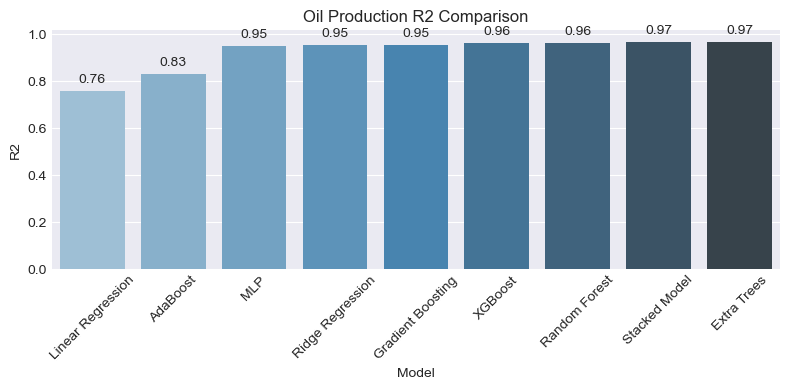

In [284]:
plot_metrics(df_metrics1, 'Oil Production', 'R2')

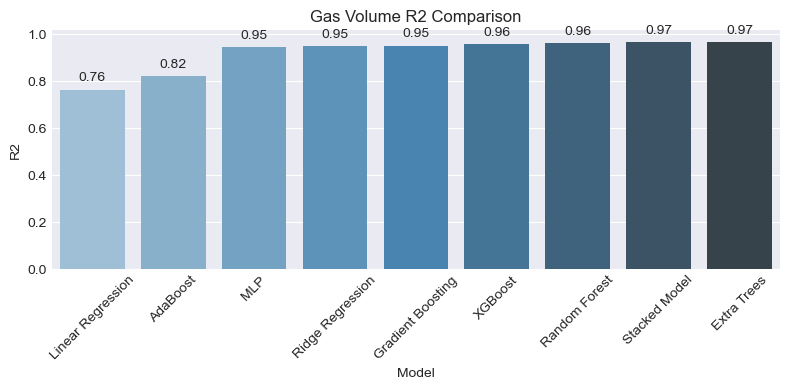

In [285]:
plot_metrics(df_metrics1, 'Gas Volume', 'R2')

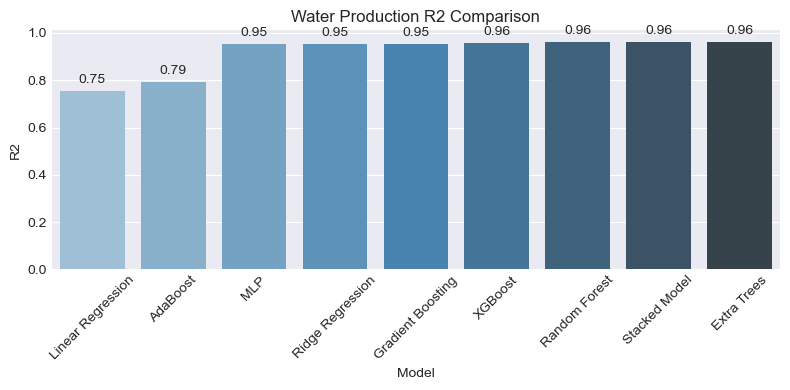

In [286]:
plot_metrics(df_metrics1, 'Water Production', 'R2')

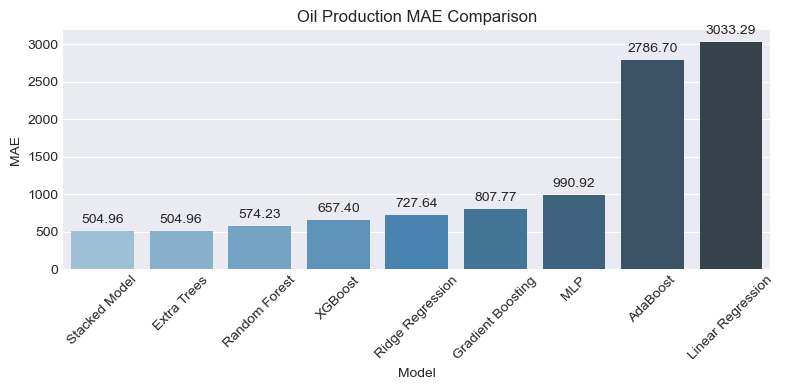

In [287]:
plot_metrics(df_metrics2, 'Oil Production', 'MAE')

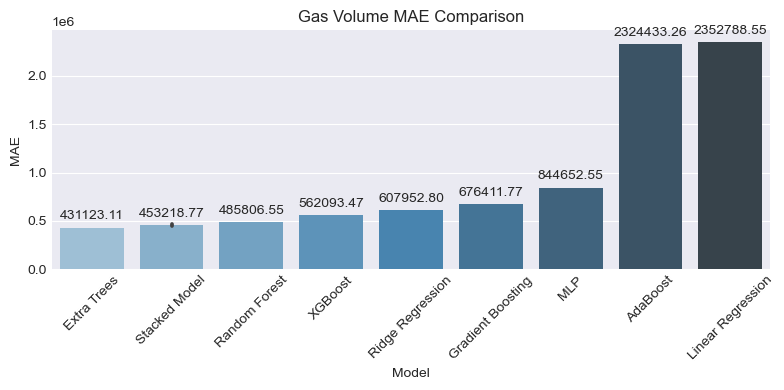

In [288]:
plot_metrics(df_metrics2, 'Gas Volume', 'MAE')

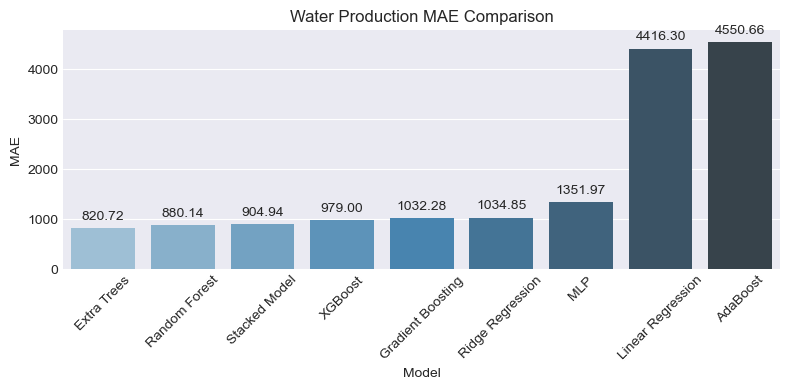

In [289]:
plot_metrics(df_metrics2, 'Water Production', 'MAE')

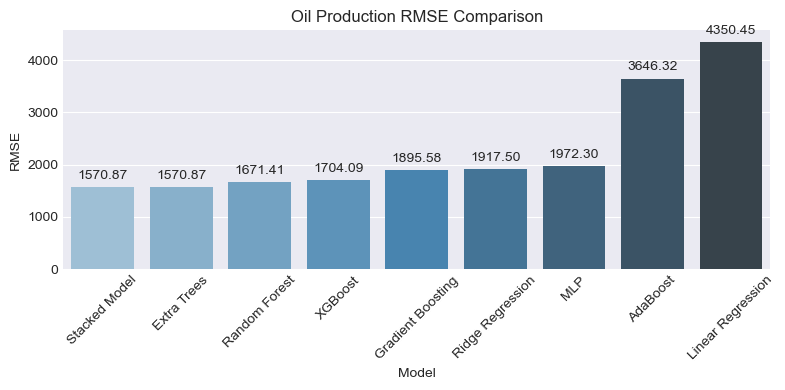

In [290]:
plot_metrics(df_metrics3, 'Oil Production', 'RMSE')

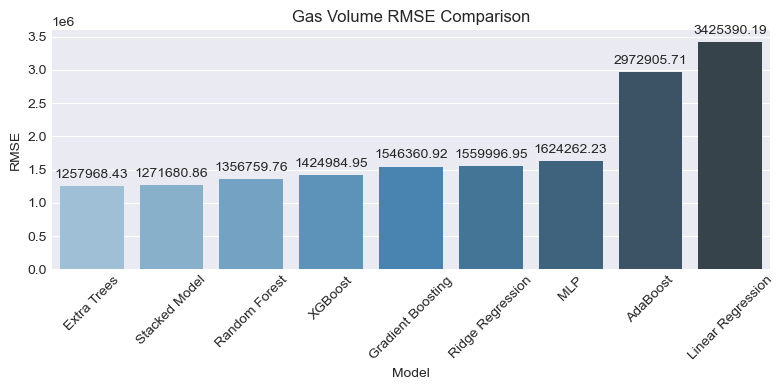

In [291]:
plot_metrics(df_metrics3, 'Gas Volume', 'RMSE')

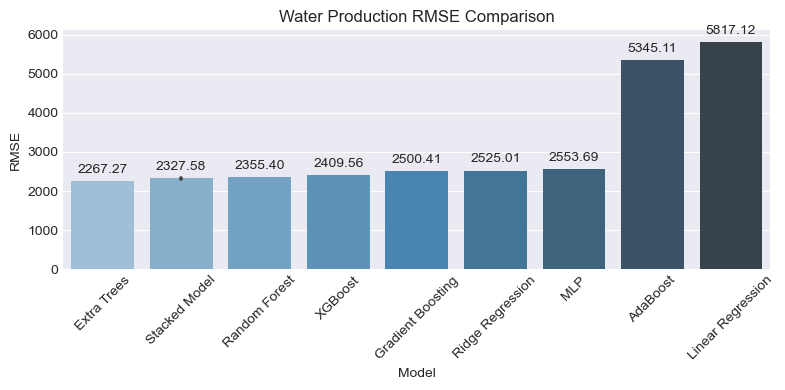

In [292]:
plot_metrics(df_metrics3, 'Water Production', 'RMSE')

One Reason why we are picking the stacked model over the extra trees model is that it reduces/avoids overfitting to the barest minimun. We can finally conclude on The Stacked model as the best performing model.

#### Let's use the Extra trees model to determine the features importance and also visualise it as well. It shows the order of importance of the features that impacts the model's performance 

In [338]:
ett1 = ExtraTreesRegressor(random_state=66, n_jobs =5)
ett1.fit(X_train, y_train)

importances = ett1.feature_importances_
std = np.std([tree.feature_importances_ for tree in ett1.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Features Ranking:")
df_imp = pd.DataFrame()
for i, j, k in zip(X_train, ett1.feature_importances_, range(len(ett1.feature_importances_))):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[k])
    df_imp = pd.concat([df_imp, aux], axis=0)
    
print(df_imp.sort_values('importance', ascending=False))

Features Ranking:
                          feature  importance
6                 Days_From_Start    0.508337
4                   AVG WHP (PSI)    0.053439
7             Pressure_Difference    0.046446
14                    Log_AVG_WHP    0.041753
17         MA30_Downhole_Pressure    0.036269
5                      Choke Size    0.033329
15                 Log_Choke_Size    0.030965
3          Annulus Pressure (PSI)    0.027239
9          Temperature_Difference    0.026239
13           Log_Annulus_Pressure    0.024559
19           MA30_Tubing_Pressure    0.024398
11       Log_Downhole_Temperature    0.022417
1   Downhole Temperature (Kelvin)    0.019630
2         Average Tubing Pressure    0.014410
12    Log_Average_Tubing_Pressure    0.013949
21          MA30_Annulus_Pressure    0.013895
8                  Pressure_Ratio    0.012695
0         Downhole Pressure (PSI)    0.011948
10          Log_Downhole_Pressure    0.011003
18            MA7_Tubing_Pressure    0.009920
20           MA7

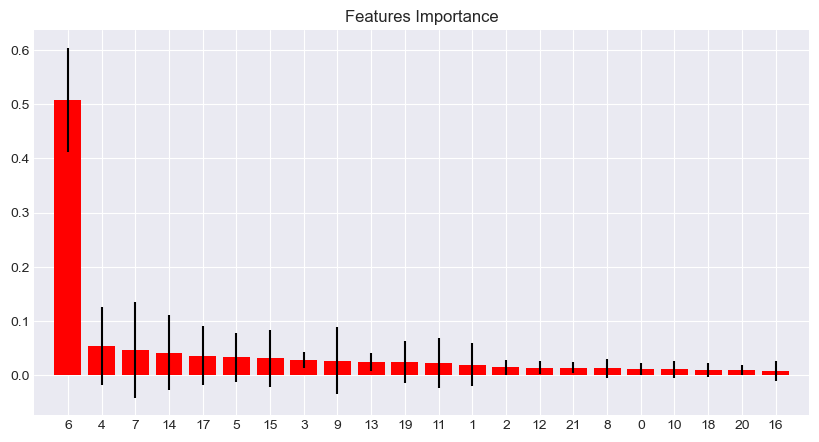

In [339]:
# Plot the impurity-based feature importances 
plt.figure(figsize=(10, 5))
plt.title("Features Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

- We can see that "Days_From_Start" is significantly the most important feature, and that makes practical sense, because in a real world settings, the performance of a reservoir depends on its productive life.

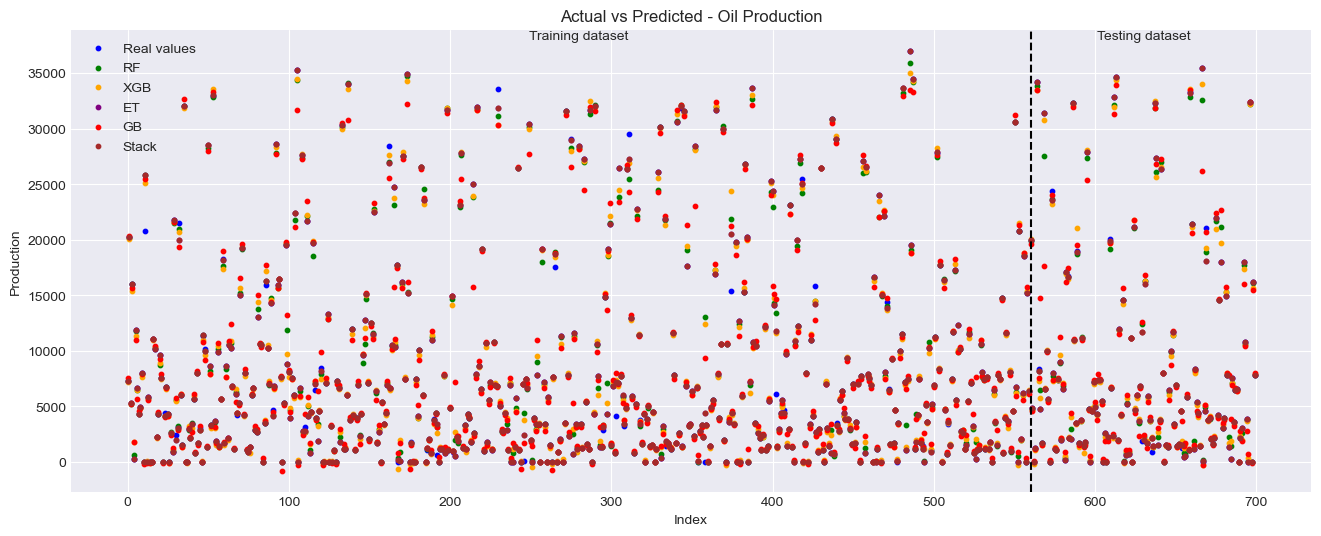

In [320]:
# predictions for each model
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_xgb = xgb_model.predict(X_train)
y_train_pred_ett = ett_model.predict(X_train)
y_train_pred_gb = GBoost_grid.predict(X_train)
y_train_pred_stack = meta_model.predict(meta_features_train)

y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_pred_et = ett_model.predict(X_test)
y_test_pred_gb = GBoost_grid.predict(X_test)
y_test_pred_stack = meta_model.predict(meta_features_test)

# Concatenating predictions and real values
predictions_rf = np.concatenate([y_train_pred_rf[:, 0], y_test_pred_rf[:, 0]], axis=0)
predictions_xgb = np.concatenate([y_train_pred_xgb[:, 0], y_test_pred_xgb[:, 0]], axis=0)
predictions_ett = np.concatenate([y_train_pred_ett[:, 0], y_test_pred_et[:, 0]], axis=0)
predictions_gb = np.concatenate([y_train_pred_gb[:, 0], y_test_pred_gb[:, 0]], axis=0)
predictions_stack = np.concatenate([y_train_pred_stack[:, 0], y_test_pred_stack[:, 0]], axis=0)
real_values = np.concatenate([y_train.iloc[:, 0], y_test.iloc[:, 0]], axis=0)

# Sample 700 points for plotting, as plotting all data points would take a lot of time, and also make the plot too condensed for interpretation
sample_size = 700
sample_indices = np.random.choice(len(real_values), sample_size, replace=False)
sampled_index = np.arange(sample_size)

# Plotting the predictions
plt.figure(figsize=(16, 6))

plt.scatter(sampled_index, real_values[sample_indices], label='Real values', color='blue', s=10)
plt.scatter(sampled_index, predictions_rf[sample_indices], label='RF', color='green', s=10)
plt.scatter(sampled_index, predictions_xgb[sample_indices], label='XGB', color='orange', s=10)
plt.scatter(sampled_index, predictions_ett[sample_indices], label='ET', color='purple', s=10)
plt.scatter(sampled_index, predictions_gb[sample_indices], label='GB', color='red', s=10)
plt.scatter(sampled_index, predictions_stack[sample_indices], label='Stack', color='brown', s=10)

# Indicate the split between training and testing datasets
train_size = int(len(y_train) * (sample_size / len(real_values)))
plt.axvline(x=train_size, color='black', linestyle='--')
plt.text(train_size / 2, plt.ylim()[1], 'Training dataset', horizontalalignment='center', verticalalignment='top')
plt.text(train_size + (sample_size - train_size) / 2, plt.ylim()[1], 'Testing dataset', horizontalalignment='center', verticalalignment='top')

plt.xlabel('Index')
plt.ylabel('Production')
plt.title('Actual vs Predicted - Oil Production')
plt.legend(loc="upper left")
plt.show()


In [353]:
from plotly.subplots import make_subplots

def plot_actual_vs_predicted(y_test, predictions, model_names):
    fig = make_subplots()

    # Prepare hover texts
    hover_texts = []
    for actual, *model_preds in zip(y_test, *predictions):
        hover_text = f"Actual: {actual:.2f}<br>"
        hover_text += "<br>".join([f"{model_names[i]}: {pred:.2f}" for i, pred in enumerate(model_preds)])
        hover_texts.append(hover_text)

    # Scatter plot for the actual values with hover texts
    fig.add_trace(go.Scatter(
        x=y_test, y=y_test,
        mode='markers',
        name='Actual Values',
        text=hover_texts,
        hoverinfo='text',
        marker=dict(size=8, color='black')
    ))

    # Scatter plots for each model's predictions
    for i, preds in enumerate(predictions):
        fig.add_trace(go.Scatter(
            x=y_test, y=preds,
            mode='markers',
            name=model_names[i],
            opacity=0.6,
            marker=dict(size=8),
            hoverinfo='skip'  
        ))

    # Diagonal line for reference
    fig.add_trace(go.Scatter(
        x=[y_test.min(), y_test.max()],
        y=[y_test.min(), y_test.max()],
        mode='lines',
        line=dict(dash='dash', color='black'),
        showlegend=False
    ))

    fig.update_layout(
        title='Actual vs Predicted',
        xaxis_title='Actual Values',
        yaxis_title='Predicted Values',
        legend_title='Models',
        width=800,
        height=600
    )

    fig.show()

predictions = [
    rf_model.predict(X_test),
    xgb_model.predict(X_test),
    ett_model.predict(X_test),
    GBoost_grid.predict(X_test),
    meta_model.predict(meta_features_test)
]

model_names = [
    'Random Forest',
    'XGBoost',
    'Extra Trees',
    'GBoost',
    'Stacked Model'
]

In [354]:
# Plot for Oil Production
plot_actual_vs_predicted(y_test.iloc[:, 0], [pred[:, 0] for pred in predictions], model_names)


In [355]:
# Plot for Gas Volume
plot_actual_vs_predicted(y_test.iloc[:, 1], [pred[:, 1] for pred in predictions], model_names)

In [356]:
# Plot for Water production
plot_actual_vs_predicted(y_test.iloc[:, 2], [pred[:, 2] for pred in predictions], model_names)

The "Closeness" of the above points to the reference diagonal line further validates the accuracy of the best five models

##### Now, lets make predictions on the validation data. however, we can't evaluate the predictions,as the original values of the target features were not provided.

In [307]:
Val_data = pd.read_csv(r"C:\Users\USER\Desktop\NAICE DATA COMP\dseats_2024_validation_dataset1.csv")
Val_data.head(10)

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE  \
0  01/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
1  02/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
2  03/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
3  04/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
4  05/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
5  06/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
6  07/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
7  08/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
8  09/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   
9  10/07/2015 00:00      DSEAT  DSEAT-001-F-1 C               105   

  WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0     001-F-1 C  production        OP              3061.253047   
1     001-F-1 C  production        OP              3247.951135   
2     001-F-1 C  production        OP              3333.012485   
3     001-F-1 C  production        OP              3404.022465   
4     001-F-1 C  production        OP              3465.473030   
5     001-F-1 C  production        OP              3528.245995   
6     001-F-1 C  production        OP              3632.555515   
7     001-F-1 C  production        OP              3789.769445   
8     001-F-1 C  production        OP              3864.126170   
9     001-F-1 C  production        OP              3911.226230   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                     380.665745              2659.809580   
1                     376.759980              2547.453670   
2                     375.985300              2533.912265   
3                     375.419010              2481.804485   
4                     375.004710              2408.310945   
5                     374.671220              2329.113395   
6                     374.592690              2283.211470   
7                     374.675730              2338.196630   
8                     374.567900              2367.046700   
9                     374.464120              2384.321710   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  
0                     0.0     401.443468    0.491632  
1                     0.0     700.497465   21.775180  
2                     0.0     799.100220   27.638780  
3                     0.0     922.217980   36.178940  
4                     0.0    1057.162085   45.424140  
5                     0.0    1199.132600   55.078030  
6                     0.0    1349.344045   65.530560  
7                     0.0    1451.572815   72.483380  
8                     0.0    1497.079470   75.718760  
9                     0.0    1526.904520   77.858250

In [308]:
Val_data.describe()

N_WELL_BORE_CODE  Downhole Pressure (PSI)  \
count       2075.000000              2075.000000   
mean         107.142651              2770.769569   
std            1.354975              1604.414730   
min          105.000000                 0.000000   
25%          106.000000              2899.657187   
50%          107.000000              3364.224336   
75%          108.000000              3864.667975   
max          109.000000              5765.033975   

       Downhole Temperature (Kelvin)  Average Tubing Pressure  \
count                    2075.000000              2075.000000   
mean                      351.655653              2447.863733   
std                        44.088178              1279.839703   
min                       273.150000                 0.000000   
25%                       363.184330              2352.860553   
50%                       374.267440              2736.140974   
75%                       379.090599              3417.707239   
max                       381.442244              5015.648165   

       Annulus Pressure (PSI)  AVG WHP (PSI)   Choke Size  
count             2075.000000    2075.000000  2075.000000  
mean               197.054017     487.723448    11.566877  
std                119.151822     337.834866    21.912249  
min                  0.000000       0.000000     0.000000  
25%                131.693688     385.785438     1.533683  
50%                219.994048     417.627583     3.402087  
75%                296.054719     464.401766     9.161726  
max                413.071107    1819.765515   109.781900

In [309]:
Val_data['PRODUCTION DATE'] = pd.to_datetime(Val_data['PRODUCTION DATE'], format="%d/%m/%Y %H:%M", dayfirst=True)
Val_data['Downhole Pressure (PSI)'] = Val_data['Downhole Pressure (PSI)'].astype(float)
Val_data['Downhole Temperature (Kelvin)'] = Val_data['Downhole Temperature (Kelvin)'].astype(float)

In [297]:
X_val_data = feature_engineering(Val_data)
X_val_data.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...  \
0                     380.665745              2659.809580  ...   
1                     376.759980              2547.453670  ...   
2                     375.985300              2533.912265  ...   
3                     375.419010              2481.804485  ...   
4                     375.004710              2408.310945  ...   

   Log_Average_Tubing_Pressure  Log_Annulus_Pressure  Log_AVG_WHP  \
0                     7.886386                   0.0     5.997555   
1                     7.843242                   0.0     6.553217   
2                     7.837914                   0.0     6.684737   
3                     7.817144                   0.0     6.827865   
4                     7.787096                   0.0     6.964289   

   Log_Choke_Size  MA7_Downhole_Pressure  MA30_Downhole_Pressure  \
0        0.399871             2766.79478             2748.115322   
1        3.125671             2766.79478             2748.115322   
2        3.354762             2766.79478             2748.115322   
3        3.615742             2766.79478             2748.115322   
4        3.837820             2766.79478             2748.115322   

   MA7_Tubing_Pressure  MA30_Tubing_Pressure  MA7_Annulus_Pressure  \
0          2444.001187           2429.221959            197.625464   
1          2444.001187           2429.221959            197.625464   
2          2444.001187           2429.221959            197.625464   
3          2444.001187           2429.221959            197.625464   
4          2444.001187           2429.221959            197.625464   

   MA30_Annulus_Pressure  
0              199.84706  
1              199.84706  
2              199.84706  
3              199.84706  
4              199.84706  

[5 rows x 29 columns]

In [298]:
X_val_data.describe()

PRODUCTION DATE  N_WELL_BORE_CODE  \
count                           2075       2075.000000   
mean   2016-01-28 06:22:22.843373312        107.142651   
min              2015-07-01 00:00:00        105.000000   
25%              2015-10-12 00:00:00        106.000000   
50%              2016-01-24 00:00:00        107.000000   
75%              2016-05-10 12:00:00        108.000000   
max              2016-09-17 00:00:00        109.000000   
std                              NaN          1.354975   

       Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
count              2075.000000                    2075.000000   
mean               2770.769569                     351.655653   
min                   0.000000                     273.150000   
25%                2899.657187                     363.184330   
50%                3364.224336                     374.267440   
75%                3864.667975                     379.090599   
max                5765.033975                     381.442244   
std                1604.414730                      44.088178   

       Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  \
count              2075.000000             2075.000000    2075.000000   
mean               2447.863733              197.054017     487.723448   
min                   0.000000                0.000000       0.000000   
25%                2352.860553              131.693688     385.785438   
50%                2736.140974              219.994048     417.627583   
75%                3417.707239              296.054719     464.401766   
max                5015.648165              413.071107    1819.765515   
std                1279.839703              119.151822     337.834866   

        Choke Size  Days_From_Start  Pressure_Difference  ...  \
count  2075.000000      2075.000000          2075.000000  ...   
mean     11.566877       211.265542           322.905837  ...   
min       0.000000         0.000000          -580.876880  ...   
25%       1.533683       103.000000             0.000000  ...   
50%       3.402087       207.000000           408.610293  ...   
75%       9.161726       314.500000           459.286969  ...   
max     109.781900       444.000000          1819.765515  ...   
std      21.912249       125.928032           497.797949  ...   

       Log_Average_Tubing_Pressure  Log_Annulus_Pressure  Log_AVG_WHP  \
count                  2075.000000           2075.000000  2075.000000   
mean                      7.409240              4.376644     5.744409   
min                       0.000000              0.000000     0.000000   
25%                       7.763812              4.887914     5.957870   
50%                       7.914669              5.398136     6.036982   
75%                       8.137018              5.693916     6.142901   
max                       8.520517              6.026038     7.507012   
std                       1.356075              2.171103     1.545474   

       Log_Choke_Size  MA7_Downhole_Pressure  MA30_Downhole_Pressure  \
count     2075.000000            2075.000000             2075.000000   
mean         1.712428            2766.794780             2757.292102   
min          0.000000               0.000000                0.000000   
25%          0.929674            2891.070793             2687.879971   
50%          1.482079            3351.036321             3417.999950   
75%          2.318627            3862.495551             3757.105998   
max          4.707563            5099.160687             5034.987733   
std          1.138750            1585.277451             1530.547336   

       MA7_Tubing_Pressure  MA30_Tubing_Pressure  MA7_Annulus_Pressure  \
count          2075.000000           2075.000000           2075.000000   
mean           2444.001187           2432.604083            197.625464   
min               0.000000              0.000000              0.000000   
25%            2370.234651           2367.476327            139.3

In [299]:
initial_features = ['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size']
engineered_features = ['Days_From_Start', 'Pressure_Difference', 'Pressure_Ratio', 'Temperature_Difference', 
                       'Log_Downhole_Pressure', 'Log_Downhole_Temperature', 'Log_Average_Tubing_Pressure', 'Log_Annulus_Pressure', 'Log_AVG_WHP', 'Log_Choke_Size',
                       'MA7_Downhole_Pressure', 'MA30_Downhole_Pressure', 'MA7_Tubing_Pressure', 'MA30_Tubing_Pressure', 
                       'MA7_Annulus_Pressure', 'MA30_Annulus_Pressure']
all_features = initial_features + engineered_features

X = X_val_data[all_features]
X.head(10)

Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
0              3061.253047                     380.665745   
1              3247.951135                     376.759980   
2              3333.012485                     375.985300   
3              3404.022465                     375.419010   
4              3465.473030                     375.004710   
5              3528.245995                     374.671220   
6              3632.555515                     374.592690   
7              3789.769445                     374.675730   
8              3864.126170                     374.567900   
9              3911.226230                     374.464120   

   Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0              2659.809580                     0.0     401.443468    0.491632   
1              2547.453670                     0.0     700.497465   21.775180   
2              2533.912265                     0.0     799.100220   27.638780   
3              2481.804485                     0.0     922.217980   36.178940   
4              2408.310945                     0.0    1057.162085   45.424140   
5              2329.113395                     0.0    1199.132600   55.078030   
6              2283.211470                     0.0    1349.344045   65.530560   
7              2338.196630                     0.0    1451.572815   72.483380   
8              2367.046700                     0.0    1497.079470   75.718760   
9              2384.321710                     0.0    1526.904520   77.858250   

   Days_From_Start  Pressure_Difference  Pressure_Ratio  \
0                0           401.443467        1.150929   
1                1           700.497465        1.274979   
2                2           799.100220        1.315362   
3                3           922.217980        1.371592   
4                4          1057.162085        1.438964   
5                5          1199.132600        1.514845   
6                6          1349.344045        1.590985   
7                7          1451.572815        1.620809   
8                8          1497.079470        1.632467   
9                9          1526.904520        1.640394   

   Temperature_Difference  ...  Log_Average_Tubing_Pressure  \
0               82.665745  ...                     7.886386   
1               78.759980  ...                     7.843242   
2               77.985300  ...                     7.837914   
3               77.419010  ...                     7.817144   
4               77.004710  ...                     7.787096   
5               76.671220  ...                     7.753672   
6               76.592690  ...                     7.733776   
7               76.675730  ...                     7.757563   
8               76.567900  ...                     7.769821   
9               76.464120  ...                     7.777089   

   Log_Annulus_Pressure  Log_AVG_WHP  Log_Choke_Size  MA7_Downhole_Pressure  \
0                   0.0     5.997555        0.399871            2766.794780   
1                   0.0     6.553217        3.125671            2766.794780   
2                   0.0     6.684737        3.354762            2766.794780   
3                   0.0     6.827865        3.615742            2766.794780   
4                   0.0     6.964289        3.837820            2766.794780   
5                   0.0     7.090187        4.026744            2766.794780   
6                   0.0     7.208115        4.197661            3381.787667   
7                   0.0     7.281092        4.297059            3485.861439   
8                   0.0     7.311939        4.340146            3573.886444   
9                   0.0     7.331652        4.367652            3656.488407   

   MA30_Downhole_Pressure  MA7_Tubing_Pressure  MA30_Tubing_Pressure  \
0             2748.115322          2444.001187           2429.221959   
1             2748.115322          2444.001187           2429.221959   
2        

In [300]:
meta_features_new = np.column_stack([
    rf_model.predict(X),
    xgb_model.predict(X),
    ett_model.predict(X),
    GBoost_grid.predict(X)
])

In [301]:
meta_predictions_new = meta_model.predict(meta_features_new)
meta_predictions_new = np.maximum(meta_predictions_new,0)

In [357]:
cum_oil = meta_predictions_new[:,0].sum()
cum_gas = meta_predictions_new[:,1].sum()
cum_water = meta_predictions_new[:,2].sum()
print(f"Cummulative Oil Production: {cum_oil:.2f} STB")
print(f"Cummulative Gas Production: {cum_gas:.2f} SCF")
print(f"Cummulative Water Production: {cum_water:.2f} STB")

Cummulative Oil Production: 28236170.49 STB
Cummulative Gas Production: 24468848461.62 SCF
Cummulative Water Production: 20244097.03 STB


In [303]:
# Creating DataFrame to store the predictions
predictions_df = pd.DataFrame(meta_predictions_new, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

predictions_df.head()


Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)
0              11391.551046          9.013162e+06                    0.000000
1              21983.025414          1.882696e+07                 3694.396752
2              20307.668818          1.761486e+07                 4245.505994
3              19308.841349          1.501863e+07                 1964.151818
4              16791.499692          1.345590e+07                 2789.431212

In [305]:
predictions_df.describe()

Oil Production (stb/day)  Gas Volume (scf/day)  \
count              2.075000e+03          2.075000e+03   
mean               1.360779e+04          1.179222e+07   
std                6.414846e+03          5.268414e+06   
min                1.791851e-11          0.000000e+00   
25%                1.136389e+04          9.981277e+06   
50%                1.355813e+04          1.246005e+07   
75%                1.780690e+04          1.501818e+07   
max                2.917188e+04          2.427799e+07   

       Water Production (stb/day)  
count                 2075.000000  
mean                  9756.191339  
std                   7102.799932  
min                      0.000000  
25%                   2204.658922  
50%                  10798.779770  
75%                  15839.539540  
max                  28707.505285

In [310]:
Val_data[['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']] = predictions_df
Val_data.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                     380.665745              2659.809580   
1                     376.759980              2547.453670   
2                     375.985300              2533.912265   
3                     375.419010              2481.804485   
4                     375.004710              2408.310945   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0     401.443468    0.491632   
1                     0.0     700.497465   21.775180   
2                     0.0     799.100220   27.638780   
3                     0.0     922.217980   36.178940   
4                     0.0    1057.162085   45.424140   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  
0              11391.551046          9.013162e+06                    0.000000  
1              21983.025414          1.882696e+07                 3694.396752  
2              20307.668818          1.761486e+07                 4245.505994  
3              19308.841349          1.501863e+07                 1964.151818  
4              16791.499692          1.345590e+07                 2789.431212

In [317]:
# Saving the Validation data...
val_path = r"C:\Users\USER\Desktop\NAICE DATA COMP\Shedrach_Igemhokhai_2024_DSEATS_Datathon_5056696.csv"
Val_data.to_csv(val_path, index=False)

#### For the Final Part of this work, we'd deploy our model in a local based web app. This webapp would take our input data, that contains the ideal features, primarily:
- Downhole Pressure (PSI)
- Downhole Temperature (Kelvin)
- Average Tubing Pressure
- Annulus Pressure (PSI)
- AVG WHP (PSI)
- Choke Size, and Performs data cleaning and feature engineering and ultimately return the production forecasts and other valuable insights from the data
- The Decline rate displayed in the webapp only denotes the change in production at the start of production to the last date in the dataset. eg, a decline rate of 50% means, current production is now 50% of start of production, while a decline rate of -50% means a 150% increase in current production, opposed to the start of production.
- The webapp runs locally and do not need internet connection to function
- Please Ensure the data to be uploaded does not contain any completely empty column

In [315]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
%matplotlib inline
import joblib
import base64
import io
import dash_bootstrap_components as dbc

# Load and clean data
def load_data(contents, filename):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            df = pd.read_excel(io.BytesIO(decoded))
        else:
            return None
        df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], dayfirst=True, errors='coerce')
        df['Downhole Pressure (PSI)'] = df['Downhole Pressure (PSI)'].astype(float)
        df['Downhole Temperature (Kelvin)'] = df['Downhole Temperature (Kelvin)'].astype(float)
        df = df.dropna(subset=['PRODUCTION DATE', "WELL_BORE_CODE", 'Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 
                               'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size'])
        df = df.sort_values(by='PRODUCTION DATE')
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Feature engineering function
def feature_engineering(df):
    if df['PRODUCTION DATE'].dtype == object:
        df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], format='%d/%m/%Y %H:%M')
    
    df['Days_From_Start'] = (df['PRODUCTION DATE'] - df['PRODUCTION DATE'].min()).dt.days
    df['Pressure_Difference'] = df['Downhole Pressure (PSI)'] - df['Average Tubing Pressure']
    df['Pressure_Ratio'] = df['Downhole Pressure (PSI)'] / (df['Average Tubing Pressure'] + 1e-5)  # Add small value to avoid division by zero
    df['Temperature_Difference'] = df['Downhole Temperature (Kelvin)'] - 298
    df['Log_Downhole_Pressure'] = np.log1p(df['Downhole Pressure (PSI)'])
    df['Log_Downhole_Temperature'] = np.log1p(df['Downhole Temperature (Kelvin)'])
    df['Log_Average_Tubing_Pressure'] = np.log1p(df['Average Tubing Pressure'])
    df['Log_Annulus_Pressure'] = np.log1p(df['Annulus Pressure (PSI)'])
    df['Log_AVG_WHP'] = np.log1p(df['AVG WHP (PSI)'])
    df['Log_Choke_Size'] = np.log1p(df['Choke Size'])
    df['MA7_Downhole_Pressure'] = df['Downhole Pressure (PSI)'].rolling(window=7).mean()
    df['MA30_Downhole_Pressure'] = df['Downhole Pressure (PSI)'].rolling(window=30).mean()
    df['MA7_Tubing_Pressure'] = df['Average Tubing Pressure'].rolling(window=7).mean()
    df['MA30_Tubing_Pressure'] = df['Average Tubing Pressure'].rolling(window=30).mean()
    df['MA7_Annulus_Pressure'] = df['Annulus Pressure (PSI)'].rolling(window=7).mean()
    df['MA30_Annulus_Pressure'] = df['Annulus Pressure (PSI)'].rolling(window=30).mean()
    
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors =5)
    
    df[["MA7_Downhole_Pressure","MA30_Downhole_Pressure","MA7_Tubing_Pressure","MA30_Tubing_Pressure", "MA7_Annulus_Pressure",
        "MA30_Annulus_Pressure"]] = imputer.fit_transform(df[["MA7_Downhole_Pressure","MA30_Downhole_Pressure","MA7_Tubing_Pressure",
                                                              "MA30_Tubing_Pressure", "MA7_Annulus_Pressure","MA30_Annulus_Pressure"]])
    return df

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div(style={'textAlign': 'center'}, children=[
    html.H1('RESERVIOR FLUID PRODUCTION FORECASTING WEBAPP'),
    html.P('This web app predicts the oil, gas, and water production rates for a given well based on historical production data. Simply upload the validation data which should contain the following parameters: Downhole Pressure (PSI), Downhole Temperature (Kelvin), Average Tubing Pressure, Annulus Pressure (PSI), AVG WHP (PSI), Choke Size, select a well, and view the forecasts.'),
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        multiple=False
    ),
    dcc.Dropdown(id='well-dropdown'),
    html.Div(id='cumulative-production'),
    dbc.Row([
        dbc.Col(dcc.Graph(id='oil-production-forecast'), width=6),
        dbc.Col(dcc.Graph(id='gas-production-forecast'), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='water-production-forecast'), width=6),
        dbc.Col(dcc.Graph(id='downhole-pressure-timeseries'), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='tubing-pressure-timeseries'), width=6),
        dbc.Col(dcc.Graph(id='average-wellhead-pressure-timeseries'), width=6)
    ]),
    html.Div(id='well-performance-summary')
])

@app.callback(
    [Output('well-dropdown', 'options'),
     Output('well-dropdown', 'value')],
    [Input('upload-data', 'contents')],
    [State('upload-data', 'filename')]
)
def update_well_dropdown(contents, filename):
    if contents and filename:
        df = load_data(contents, filename)
        if df is not None:
            options = [{'label': well, 'value': well} for well in df['WELL_BORE_CODE'].unique()]
            return options, df['WELL_BORE_CODE'].unique()[0]
    return [], None

@app.callback(
    [Output('cumulative-production', 'children'),
     Output('oil-production-forecast', 'figure'),
     Output('gas-production-forecast', 'figure'),
     Output('water-production-forecast', 'figure'),
     Output('downhole-pressure-timeseries', 'figure'),
     Output('tubing-pressure-timeseries', 'figure'),
     Output('average-wellhead-pressure-timeseries', 'figure'),
     Output('well-performance-summary', 'children')],
    [Input('well-dropdown', 'value')],
    [State('upload-data', 'contents'),
     State('upload-data', 'filename')]
)
def update_figure(selected_well, contents, filename):
    if selected_well and contents and filename:
        try:
            df = load_data(contents, filename)
            df = feature_engineering(df)
            well_data = df[df['WELL_BORE_CODE'] == selected_well]

            if well_data.empty:
                raise ValueError(f"No data available for well {selected_well}")

            model_rf = joblib.load('rf_forecasting_model.pkl')
            model_xgb = joblib.load('xgb_forecasting_model.pkl')
            model_ett = joblib.load('ett_forecasting_model.pkl')
            model_gbt = joblib.load('gbt_forecasting_model.pkl')
            stacked_model = joblib.load('stacked_forecasting_model.pkl')
            
            initial_features = ['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size']
            engineered_features = ['Days_From_Start', 'Pressure_Difference', 'Pressure_Ratio', 'Temperature_Difference',
                                   'Log_Downhole_Pressure', 'Log_Downhole_Temperature', 'Log_Average_Tubing_Pressure', 'Log_Annulus_Pressure', 'Log_AVG_WHP', 'Log_Choke_Size',
                                   'MA7_Downhole_Pressure', 'MA30_Downhole_Pressure', 'MA7_Tubing_Pressure', 'MA30_Tubing_Pressure', 
                                   'MA7_Annulus_Pressure', 'MA30_Annulus_Pressure']
            all_features = initial_features + engineered_features
            
            X_new = well_data[all_features]
            meta_features = np.column_stack([
                model_rf.predict(X_new),
                model_xgb.predict(X_new),
                model_ett.predict(X_new),
                model_gbt.predict(X_new)
            ])
            y_pred = stacked_model.predict(meta_features)
            y_pred = np.maximum(y_pred,0)
            
            well_data['Predicted Oil'] = y_pred[:, 0]
            well_data['Predicted Gas'] = y_pred[:, 1]
            well_data['Predicted Water'] = y_pred[:, 2]

            # Calculate cumulative production
            cumulative_oil = well_data['Predicted Oil'].sum()
            cumulative_gas = well_data['Predicted Gas'].sum()
            cumulative_water = well_data['Predicted Water'].sum()
            cumulative_production_text = [
                html.H3('Cumulative Production'),
                html.P(f'Cumulative Oil Production: {cumulative_oil:.2f} stb'),
                html.P(f'Cumulative Gas Production: {cumulative_gas:.2f} scf'),
                html.P(f'Cumulative Water Production: {cumulative_water:.2f} stb')
            ]

            # Oil production forecast
            fig_oil = go.Figure()
            fig_oil.add_trace(go.Scatter(x=well_data['PRODUCTION DATE'], y=well_data['Predicted Oil'], mode='lines', name='Predicted Oil Production'))
            fig_oil.update_layout(title=f'Oil Production Forecast - Well {selected_well}', xaxis_title='Production Date', yaxis_title='Oil Production (stb/day)')

            # Gas production forecast
            fig_gas = go.Figure()
            fig_gas.add_trace(go.Scatter(x=well_data['PRODUCTION DATE'], y=well_data['Predicted Gas'], mode='lines', name='Predicted Gas Production'))
            fig_gas.update_layout(title=f'Gas Production Forecast - Well {selected_well}', xaxis_title='Production Date', yaxis_title='Gas Production (scf/day)')

            # Water production forecast
            fig_water = go.Figure()
            fig_water.add_trace(go.Scatter(x=well_data['PRODUCTION DATE'], y=well_data['Predicted Water'], mode='lines', name='Predicted Water Production'))
            fig_water.update_layout(title=f'Water Production Forecast - Well {selected_well}', xaxis_title='Production Date', yaxis_title='Water Production (stb/day)')

            # Downhole Pressure Time-series
            fig_downhole_pressure = go.Figure()
            fig_downhole_pressure.add_trace(go.Scatter(x=well_data['PRODUCTION DATE'], y=well_data['Downhole Pressure (PSI)'], mode='lines', name='Downhole Pressure (PSI)'))
            fig_downhole_pressure.update_layout(title=f'Downhole Pressure Over Time - Well {selected_well}', xaxis_title='Production Date', yaxis_title='Downhole Pressure (PSI)')

            # Tubing Pressure Time-series
            fig_tubing_pressure = go.Figure()
            fig_tubing_pressure.add_trace(go.Scatter(x=well_data['PRODUCTION DATE'], y=well_data['Average Tubing Pressure'], mode='lines', name='Average Tubing Pressure'))
            fig_tubing_pressure.update_layout(title=f'Tubing Pressure Over Time - Well {selected_well}', xaxis_title='Production Date', yaxis_title='Average Tubing Pressure')

            # Average Wellhead Pressure Time-series
            fig_wellhead_pressure = go.Figure()
            fig_wellhead_pressure.add_trace(go.Scatter(x=well_data['PRODUCTION DATE'], y=well_data['AVG WHP (PSI)'], mode='lines', name='Average Wellhead Pressure (PSI)'))
            fig_wellhead_pressure.update_layout(title=f'Wellhead Pressure Over Time - Well {selected_well}', xaxis_title='Production Date', yaxis_title='Average Wellhead Pressure (PSI)')

            # Well Performance Summary
            avg_production_oil = well_data['Predicted Oil'].mean()
            avg_production_gas = well_data['Predicted Gas'].mean()
            avg_production_water = well_data['Predicted Water'].mean()
            peak_production_oil = well_data['Predicted Oil'].max()
            peak_production_gas = well_data['Predicted Gas'].max()
            peak_production_water = well_data['Predicted Water'].max()
            decline_rate_oil = (well_data['Predicted Oil'].iloc[0] - well_data['Predicted Oil'].iloc[-1]) / well_data['Predicted Oil'].iloc[0]
            decline_rate_gas = (well_data['Predicted Gas'].iloc[0] - well_data['Predicted Gas'].iloc[-1]) / well_data['Predicted Gas'].iloc[0]
            decline_rate_water = (well_data['Predicted Water'].iloc[0] - well_data['Predicted Water'].iloc[-1]) / well_data['Predicted Water'].iloc[0]

            well_performance_summary = [
                html.H3('Well Performance Summary'),
                html.P(f'Average Oil Production: {avg_production_oil:.2f} stb/day'),
                html.P(f'Average Gas Production: {avg_production_gas:.2f} scf/day'),
                html.P(f'Average Water Production: {avg_production_water:.2f} stb/day'),
                html.P(f'Peak Oil Production: {peak_production_oil:.2f} stb/day'),
                html.P(f'Peak Gas Production: {peak_production_gas:.2f} scf/day'),
                html.P(f'Peak Water Production: {peak_production_water:.2f} stb/day'),
                html.P(f'Oil Decline Rate: {decline_rate_oil:.2%}'),
                html.P(f'Gas Decline Rate: {decline_rate_gas:.2%}'),
                html.P(f'Water Decline Rate: {decline_rate_water:.2%}')
            ]

            return cumulative_production_text, fig_oil, fig_gas, fig_water, fig_downhole_pressure, fig_tubing_pressure, fig_wellhead_pressure, well_performance_summary
        except ValueError as ve:
            print(f"Warning: {ve}")
            return [], {}, {}, {}, {}, {}, {}, []
        except Exception as e:
            print(f"Error updating figure: {e}")
            return [], {}, {}, {}, {}, {}, {}, []
    return [], {}, {}, {}, {}, {}, {}, []

if __name__ == '__main__':
    app.run_server(debug=True, port = 700)


## A successfully deployed web app, would look like the image below

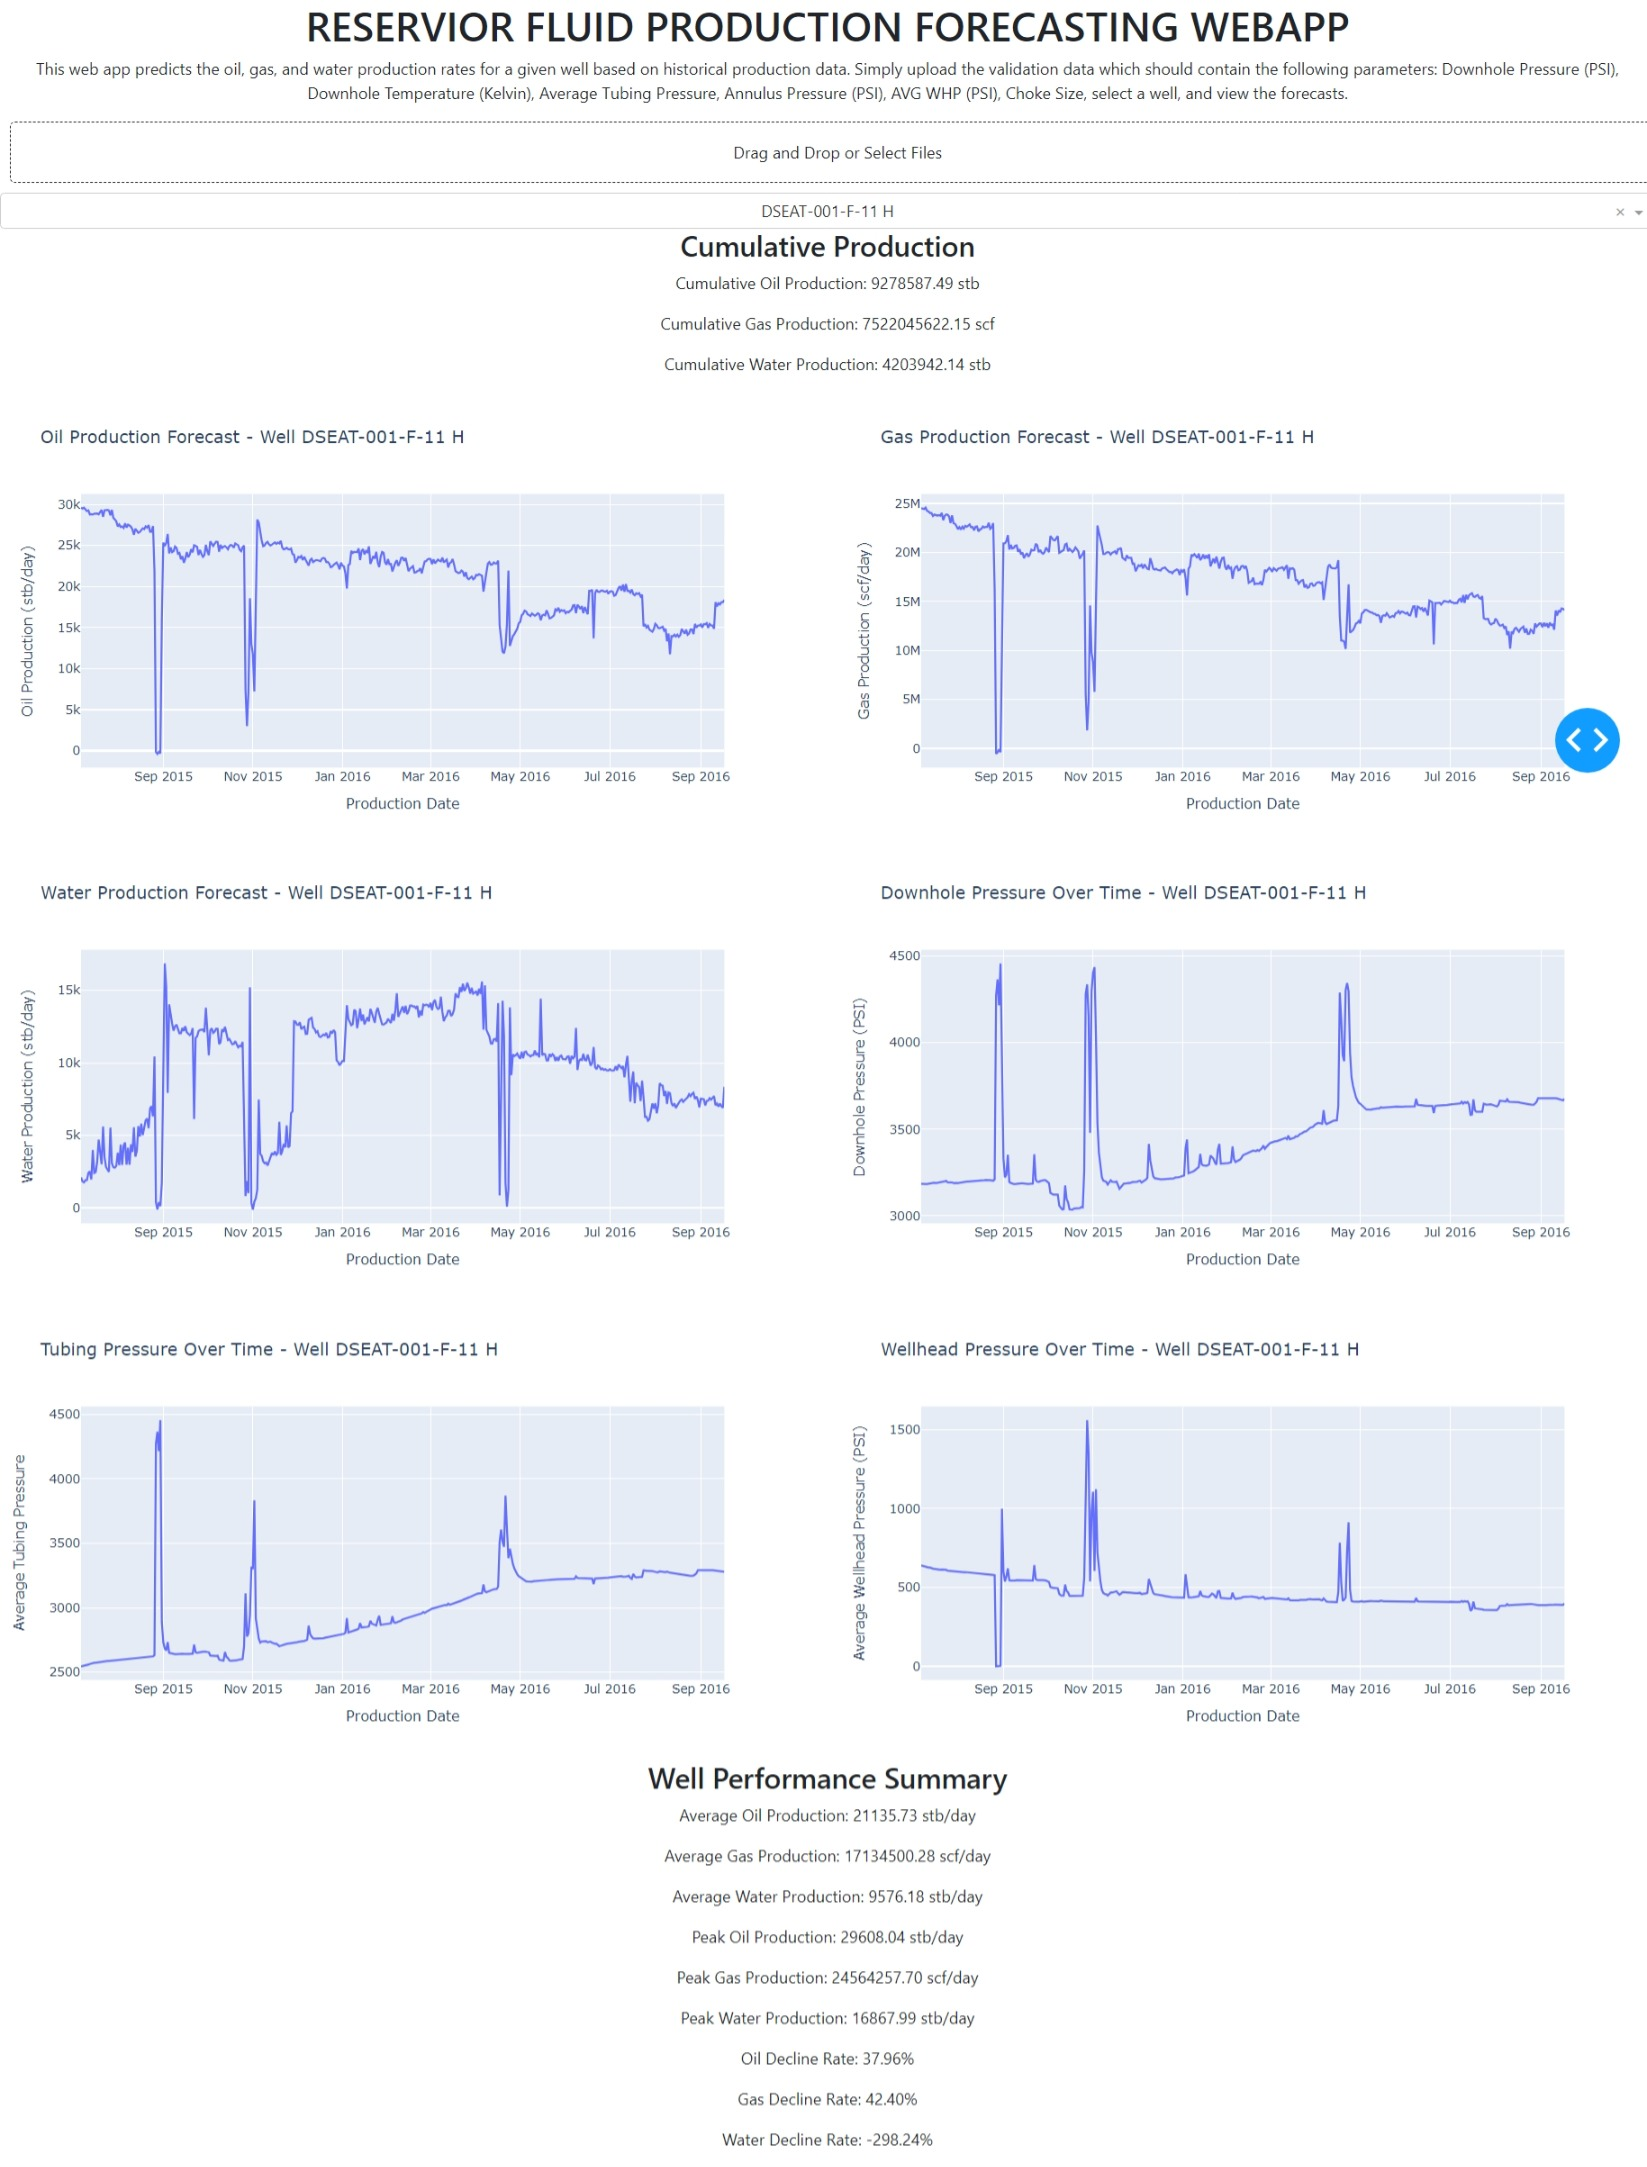

#### Best Regards,
[Shedrach Igemhokhai](https://www.linkedin.com/shedrach-igemokhai)